# Data Wrangling

In [2]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import geopandas as gpd

In [3]:
## , index_col='Neighborhood'
## !pip install folium
# https://www.kaggle.com/uds5501/chicago-crime-mapping?scriptVersionId=5579459--EDA 
# https://www.seattle.gov/police/information-and-data/crime-dashboard --something similar for Tableau 
# https://medium.com/@ODSC/real-life-robocop-how-nlp-is-fighting-financial-crime-a305f7fd3f3f --great for unstructured data 
# NLP + crime https://github.com/lambamayank2394/Sentiment-Analysis-of-Crime-and-Negative-tweets-data-using-NLP 
# https://www.seattle.gov/police/information-and-data/tweets-by-beat--Could do a beat map 
# https://www.seattle.gov/police/information-and-data/view-police-reports--Police reports 
# https://data.seattle.gov/Public-Safety/Crime-Data/4fs7-3vj5/data --data table

In [4]:
# Importing the dataframe
df = pd.read_csv('C:/Users/jennywhojennyvu/Desktop/Capstone_2/Crime_Data.csv')
df.head()

Report Number Occurred Date  Occurred Time Reported Date  Reported Time  \
0   1.975000e+12    12/16/1975          900.0    12/16/1975         1500.0   
1   1.976000e+12      1/1/1976            1.0     1/31/1976         2359.0   
2   1.979000e+12     1/28/1979         1600.0      2/9/1979         1430.0   
3   1.981000e+13     8/22/1981         2029.0     8/22/1981         2030.0   
4   1.981000e+12     2/14/1981         2000.0     2/15/1981          435.0   

      Crime Subcategory   Primary Offense Description   Precinct Sector Beat  \
0  BURGLARY-RESIDENTIAL            BURGLARY-FORCE-RES      SOUTH      R   R3   
1     SEX OFFENSE-OTHER     SEXOFF-INDECENT LIBERTIES    UNKNOWN    NaN  NaN   
2             CAR PROWL                THEFT-CARPROWL       EAST      G   G2   
3              HOMICIDE  HOMICIDE-PREMEDITATED-WEAPON      SOUTH      S   S2   
4  BURGLARY-RESIDENTIAL            BURGLARY-FORCE-RES  SOUTHWEST      W   W3   

                     Neighborhood  
0            LAKEWOOD/SEWARD PARK  
1                         UNKNOWN  
2        CENTRAL AREA/SQUIRE PARK  
3                 BRIGHTON/DUNLAP  
4  ROXHILL/WESTWOOD/ARBOR HEIGHTS

In [5]:
df = df[['Report Number','Occurred Date','Occurred Time','Reported Date','Reported Time', 'Crime Subcategory', 'Primary Offense Description', 'Precinct', 'Sector', 'Beat', 'Neighborhood']]

In [6]:
# Changing column names
df.columns = ['Report_Number', 'Occurred_Date', 'Occurred_Time', 'Reported_Date', 'Reported_Time', 'Crime_Subcategory', 'Primary_Offense_Description', 'Precinct', 'Sector', 'Beat', 'Neighborhood']

In [7]:
crime_reports = len(df)
report_number = df.Report_Number.unique().size
crime_cat = df.Crime_Subcategory.unique().size


print("Number of crime reports: {:d}".format(crime_reports))
print("Number of report numbers: {:d}".format(report_number))
print("Number of crime subcategories: {:d}".format(crime_cat))

Number of crime reports: 523590
Number of report numbers: 1178
Number of crime subcategories: 31


In [8]:
#let's drop rows with missing offense description
df = df[~df.Primary_Offense_Description.isnull()]
df.head()


Report_Number Occurred_Date  Occurred_Time Reported_Date  Reported_Time  \
0   1.975000e+12    12/16/1975          900.0    12/16/1975         1500.0   
1   1.976000e+12      1/1/1976            1.0     1/31/1976         2359.0   
2   1.979000e+12     1/28/1979         1600.0      2/9/1979         1430.0   
3   1.981000e+13     8/22/1981         2029.0     8/22/1981         2030.0   
4   1.981000e+12     2/14/1981         2000.0     2/15/1981          435.0   

      Crime_Subcategory   Primary_Offense_Description   Precinct Sector Beat  \
0  BURGLARY-RESIDENTIAL            BURGLARY-FORCE-RES      SOUTH      R   R3   
1     SEX OFFENSE-OTHER     SEXOFF-INDECENT LIBERTIES    UNKNOWN    NaN  NaN   
2             CAR PROWL                THEFT-CARPROWL       EAST      G   G2   
3              HOMICIDE  HOMICIDE-PREMEDITATED-WEAPON      SOUTH      S   S2   
4  BURGLARY-RESIDENTIAL            BURGLARY-FORCE-RES  SOUTHWEST      W   W3   

                     Neighborhood  
0            LAKEWOOD/SEWARD PARK  
1                         UNKNOWN  
2        CENTRAL AREA/SQUIRE PARK  
3                 BRIGHTON/DUNLAP  
4  ROXHILL/WESTWOOD/ARBOR HEIGHTS

In [9]:
a = df.Report_Number

In [11]:
df.head()

Report_Number Occurred_Date  Occurred_Time Reported_Date  Reported_Time  \
0   1.975000e+12    12/16/1975          900.0    12/16/1975         1500.0   
1   1.976000e+12      1/1/1976            1.0     1/31/1976         2359.0   
2   1.979000e+12     1/28/1979         1600.0      2/9/1979         1430.0   
3   1.981000e+13     8/22/1981         2029.0     8/22/1981         2030.0   
4   1.981000e+12     2/14/1981         2000.0     2/15/1981          435.0   

      Crime_Subcategory   Primary_Offense_Description   Precinct Sector Beat  \
0  BURGLARY-RESIDENTIAL            BURGLARY-FORCE-RES      SOUTH      R   R3   
1     SEX OFFENSE-OTHER     SEXOFF-INDECENT LIBERTIES    UNKNOWN    NaN  NaN   
2             CAR PROWL                THEFT-CARPROWL       EAST      G   G2   
3              HOMICIDE  HOMICIDE-PREMEDITATED-WEAPON      SOUTH      S   S2   
4  BURGLARY-RESIDENTIAL            BURGLARY-FORCE-RES  SOUTHWEST      W   W3   

                     Neighborhood  
0            LAKEWOOD/SEWARD PARK  
1                         UNKNOWN  
2        CENTRAL AREA/SQUIRE PARK  
3                 BRIGHTON/DUNLAP  
4  ROXHILL/WESTWOOD/ARBOR HEIGHTS

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523590 entries, 0 to 523589
Data columns (total 11 columns):
Report_Number                  523590 non-null float64
Occurred_Date                  523588 non-null object
Occurred_Time                  523588 non-null float64
Reported_Date                  523590 non-null object
Reported_Time                  523588 non-null float64
Crime_Subcategory              523328 non-null object
Primary_Offense_Description    523590 non-null object
Precinct                       523584 non-null object
Sector                         520244 non-null object
Beat                           520292 non-null object
Neighborhood                   523590 non-null object
dtypes: float64(3), object(8)
memory usage: 47.9+ MB


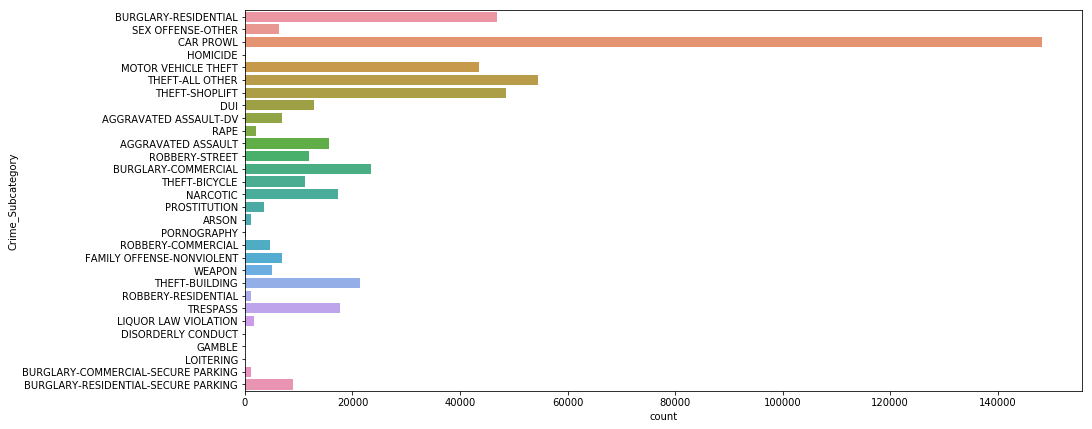

In [13]:
# WHAT are the most common crimes? 
plt.figure(figsize = (15, 7))
sns.countplot(y = df['Crime_Subcategory'])

Figure above shows visually the different subcategories of crime in Seattle. Highest crime committed by far is car prowl, 
followed by theft and burglary. 

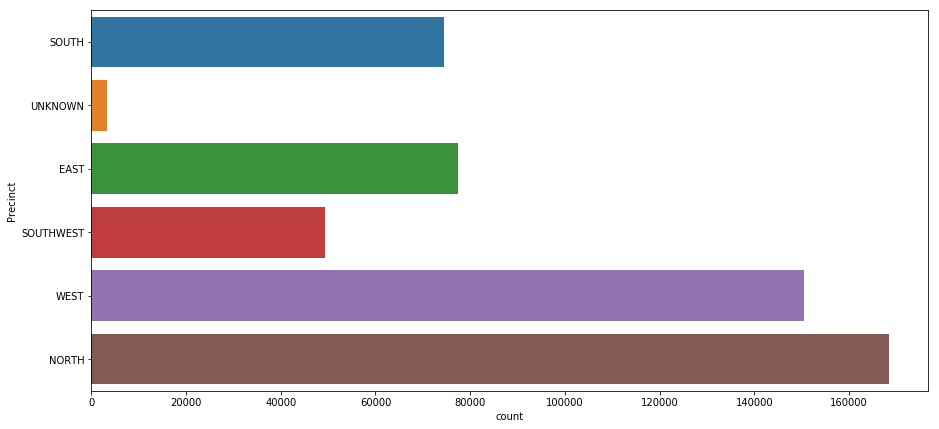

In [14]:
# WHERE are the most common crimes? 
plt.figure(figsize = (15, 7))
sns.countplot(y = df['Precinct'])

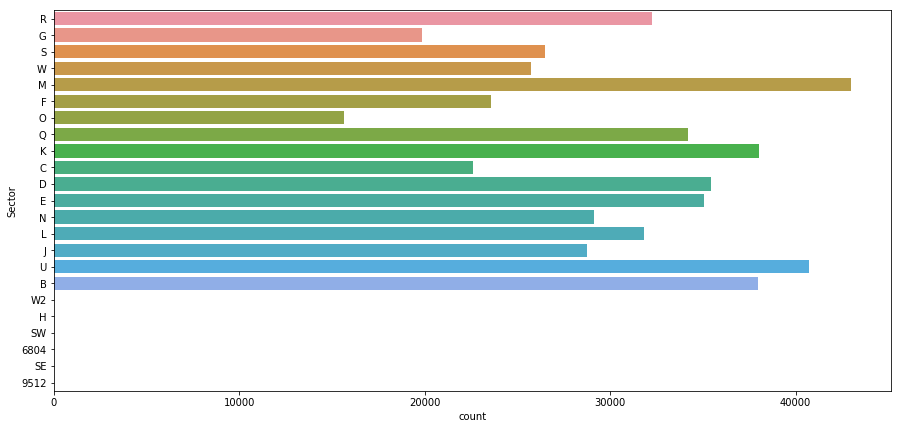

In [15]:
# WHERE are the most common crimes? 
plt.figure(figsize = (15, 7))
sns.countplot(y = df['Sector'])

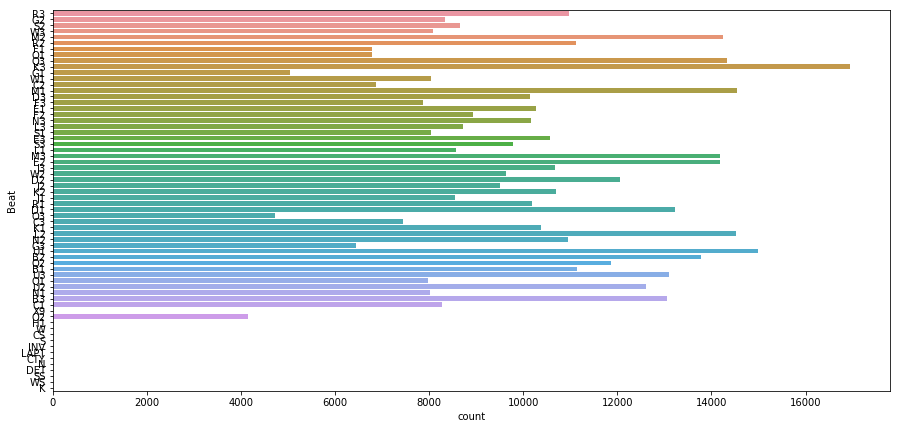

In [16]:
# WHERE are the most common crimes? 
plt.figure(figsize = (15, 7))
sns.countplot(y = df['Beat'])

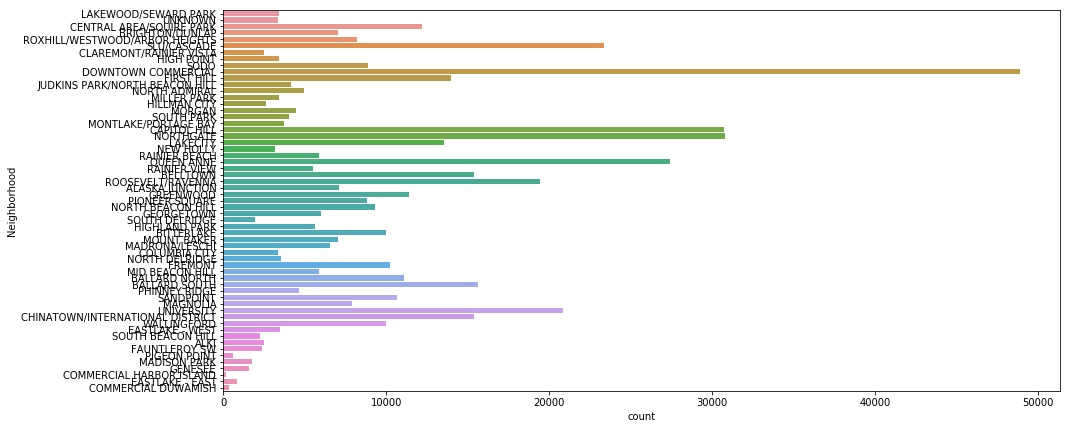

In [17]:
# WHERE are the most common crimes? 
plt.figure(figsize = (15, 7))
sns.countplot(y = df['Neighborhood'])

In [18]:
#extract text from PDF
#https://stackoverflow.com/questions/34837707/how-to-extract-text-from-a-pdf-file 
#the WHY behind NLP and purpose 
#https://www2.deloitte.com/insights/us/en/focus/cognitive-technologies/natural-language-processing-examples-in-government-data.html

In [19]:
#!pip install PyPDF2

In [24]:
# Text for assault crimes 
import PyPDF2
import re
import os

assault = []
assault_number = []

for foldername,subfolders,files in os.walk(r"C:/Users/jennywhojennyvu/Desktop/Capstone_2/AggravatedAssaultPDF"):
    for file in files:
        text = ""
        # open the pdf file
        pdfReader = PyPDF2.PdfFileReader(os.path.join(foldername,file))

        # get number of pages
        NumPages = pdfReader.getNumPages()
        
        for i in range(NumPages):
            page = pdfReader.getPage(i)
            print(page.extractText())
            text = text + page.extractText()

        # define keyterms
        String = "15 INITIAL INCIDENT DESCRIPTION / NARRATIVE:"
        start = '15 INITIAL INCIDENT DESCRIPTION / NARRATIVE:'
        end = 'I hereby declare (certify)'
        s = text
        assault.append ((s.split(start))[1].split(end)[0])
        
        # define keyterms report number 
assault_number = files

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2018-454264REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 6524      Printed On Dec-11-2018  (Tue.)Page 1 of 7General Offense InformationOperational StatusREFERRED -CITY ATTNY LAW DEPT BY FOLLOW-UP UNITReported OnDEC-05-2018  (WED.) 2131Occurred OnDEC-05-2018  (WED.) 2019Approved OnDEC-06-2018  (THU.)Approved By7509  -  DUNCKLE, MICHAEL DReport SubmittedBy7403  -  HARRIS, LLOYD JOrg UnitSOUTH PCT 3RD W - ROBERTAddress 24 AV SMunicipalitySEATTLEDistrict R Beat R2 Grid 7906Felony/MisdemeanorFELONYOffenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationOTHER/UNKNOWNSuspected Of UsingNOT APPLICABLECriminal ActivityGANG - NONE/UNKNOWNWeapon TypeKNIFE/CUTTING INSTRUMENTOffense #2   5309-0   HARASSMENT  -  COMPLETEDLocationOTHER/UNKNOWNSuspected Of UsingNOT APPLICABLE
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - S

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-103620INACTIVE For 6524      Printed On Mar-27-2019  (Wed.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnMAR-23-2019  (SAT.) 1234Occurred OnMAR-22-2019  (FRI.) 2240Approved OnMAR-23-2019  (SAT.)Approved By6101  -  VWICH, YANALReport SubmittedBy8303  -  BUTENHOFF, DILLON JOrg UnitEAST PCT 2ND W - CHARLIE RELIEFAccompanied By7795  -  VERGARA, SERGIO AAddress UNIVERSITY WY NEPlaceMunicipalitySEATTLEDistrict U Beat U2 Grid 3612Offenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationBAR/NIGHT CLUBSuspected Of UsingNOT APPLICABLECriminal ActivityGANG - NONE/UNKNOWNWeapon TypeOTHER WEAPON
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-103620
INACTIVE
 
For 6524      Printed On Mar-27-2019  (Wed.)
Page 
2
 of 
6
Relate

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-103890
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 6524      Printed On Mar-27-2019  (Wed.)
Page 
2
 of 
7
Related Event(s)
1. CP  2019-103890
2. AB  2019-202259235

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-103890
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 6524      Printed On Mar-27-2019  (Wed.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
7824 - REARDON, CARA M
Subject
NARRATIVE
Related Date/Time
MAR-23-2019  (SAT.) 1853
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[7515-DUNBAR, JOSHUA D
8534-BRANHAM, JOHN M
8491-ANTHES, JOSEPH J             ]
               
2  CHARGES:  [Booked KCJ                      

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-103891
INACTIVE
 
For 6524      Printed On Mar-27-2019  (Wed.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-103891

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-103891
INACTIVE
 
For 6524      Printed On Mar-27-2019  (Wed.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
7454 - BESELER, ERIC S.
Subject
BIAS INCIDENT
Related Date/Time
MAR-23-2019  (SAT.) 1858
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[                                                                             ]
               
2  CHARGES:  [                                                 ]
   CHARGE DESCRIPTION:
[                                                      

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-104278INACTIVE For 5306      Printed On Mar-27-2019  (Wed.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnMAR-24-2019  (SUN.) 19Occurred OnMAR-24-2019  (SUN.) 19Approved OnMAR-24-2019  (SUN.)Approved By5712  -  GIESE, DALE JReport SubmittedBy8397  -  VAAGA, JOSHUA SOrg UnitWEST PCT 2ND W - KINGAddress 1 AV SMunicipalitySEATTLEDistrict K Beat K2 Grid 628Offenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationBAR/NIGHT CLUBSuspected Of UsingNOT APPLICABLECriminal ActivityGANG - NONE/UNKNOWNWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-104278
INACTIVE
 
For 5306      Printed On Mar-27-2019  (Wed.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-104278

SEATTLE POL

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-104411
INACTIVE
 
For 5306      Printed On Mar-27-2019  (Wed.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ASSLT-AGG-WEAPON)
GO#  2019-104749

Table of Contents
Related Event GO#  2019-104749 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

Table of Contents
Related Event GO#  2019-105148 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE 
.

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-105148
INACTIVE
 
For 5914      Printed On Mar-27-2019  (Wed.)
Page 
6
 of 
7
         State of Washington that this report is true and correct to the best of       
         my knowledge and belief (RCW 9A.72.085)       
   
          Electronically signed:       
          VELASQUEZ, RICARDO M                 Date:         Mar-24-2019       Place: Seattle, WA    
   
   

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-105148
INACTIVE
 
For 5914      Printed On Mar-27-2019  (Wed.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(BURGLARY-NOFORCE-RES)
GO#  2019-105189

Table of Contents
Related Event GO#  2019-105189 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Table of Contents
Related Event GO#  2019-105506 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - 4615 S HENDERSO

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1304-0 ASSLT-AGG-GUN)GO# 2019-105506OPEN For 5914      Printed On Mar-27-2019  (Wed.)Page 6 of 8The slug was photographed and recovered and submitted into evidence.                S Henderson St front door was unlocked and officers checked the residenceto see if anyone was inside and check their welfare.  While officers were
inside  S Henderson St, officers located multiple shell casings inside the

listed residence, mainly in the living room area.  No one else was located
inside the listed residence.
               
Based off of the above listed information with W/ story and shell casings

being found inside the listed residence, I re-contacted C/  I asked

C/ again what happened and he was adament that he and V/ were the

only two people inside the listed residence at the time of the shooting.
C/ later stated there were some girls with them there earlier, but they
had left.  C/ stated he 

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ASSLT-AGG-GUN)
GO#  2019-106487

Table of Contents
Related Event GO#  2019-106487 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-106614OPEN For 7985      Printed On Mar-28-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusOPENReported OnMAR-25-2019  (MON.) 2313Occurred OnMAR-25-2019  (MON.) 2313Approved OnMAR-26-2019  (TUE.)Approved By6793  -  RAGUSO, DOUGReport SubmittedBy8395  -  JORDON, TRAVIS DOrg UnitEAST PCT 3RD W - E/G RELIEFAccompanied By8450  -  PATTON, ALEXANDER AAddress BROADWAYMunicipalitySEATTLEDistrict E Beat E3 Grid 6260Offenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDSuspected Of UsingNOT APPLICABLEWeapon TypeKNIFE/CUTTING INSTRUMENT
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-106614
OPEN
 
For 7985      Printed On Mar-28-2019  (Thu.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-106614

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HAR

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-106622
INACTIVE
 
For 7985      Printed On Mar-28-2019  (Thu.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ASSLT-AGG-BODYFORCE)
GO#  2019-106850

Table of Contents
Related Event GO#  2019-106850 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.



SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1304-0 ASSLT-AGG-GUN)GO# 2019-109196INACTIVE For 8098      Printed On May-06-2019  (Mon.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnMAR-27-2019  (WED.) 2032Occurred OnMAR-27-2019  (WED.) 2032Approved OnMAR-27-2019  (WED.)Approved By5834  -  BERG, STEVEN LReport SubmittedBy8442  -  BERTSCH, NATHAN MOrg UnitNORTH PCT 3RD W - L/U RELIEFMunicipalitySEATTLEDistrict K Beat K3 Grid 12043Offenses (Completed/Attempted)Offense #1   1304-0   ASSLT-AGG-GUN  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypeFIREARM, OTHER
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1304-0 ASSLT-AGG-GUN)
GO# 2019-109196
INACTIVE
 
For 8098      Printed On May-06-2019  (Mon.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-109196

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1306-0 ASSLT-AGG-BODYFORCE)GO# 2019-109306REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 8098      Printed On May-06-2019  (Mon.)Page 1 of 7General Offense InformationOperational StatusREFERRED -CITY ATTNY LAW DEPT BY FOLLOW-UP UNITReported OnMAR-27-2019  (WED.) 2229Occurred OnMAR-27-2019  (WED.) 2229Approved OnMAR-28-2019  (THU.)Approved By7414  -  FLIEGEL, GREGORY AReport SubmittedBy7670  -  WINNINGHAM, NOAHOrg UnitWEST PCT 3RD W - DAVID BEATSMunicipalitySEATTLEDistrict D Beat D2 Grid 6019Offenses (Completed/Attempted)Offense #1   1306-0   ASSLT-AGG-BODYFORCE  -  COMPLETEDLocationPARKING LOT/GARAGESuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)Offense #2   1313-0   ASSLT-NONAGG  -  COMPLETEDLocationPARKING LOT/GARAGESuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARD

Table of Contents
Related Event GO#  2019-109436 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-109512INACTIVE For 8098      Printed On May-06-2019  (Mon.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnMAR-28-2019  (THU.) 0423Occurred OnMAR-28-2019  (THU.) 0423Approved OnMAR-28-2019  (THU.)Approved By6818  -  JANES, THOMAS JRReport SubmittedBy8354  -  O'DELL, JUSTIN TOrg UnitNORTH PCT 1ST W - NORA (JOHN)MunicipalitySEATTLEDistrict N Beat N3 Grid 8869Offenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationRESIDENCE/HOMESuspected Of UsingNOT APPLICABLEWeapon TypeOTHER WEAPON
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-109512
INACTIVE
 
For 8098      Printed On May-06-2019  (Mon.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-109512

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDAC

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1304-0 ASSLT-AGG-GUN)
GO# 2019-110478
ADMINISTRATIVE
CLEARANCE
 
For 8098      Printed On May-06-2019  (Mon.)
Page 
6
 of 
7
submitted to evidence. The items were submitted to evidence should further
investigation be needed if a victim is identified.
               
 
Officer Harris #7403 transported the evidence to the evidence unit.  
]
   
         I hereby declare (certify) under penalty of perjury under the laws of the       
         State of Washington that this report is true and correct to the best of       
         my knowledge and belief (RCW 9A.72.085)       
   
          Electronically signed:       
          HAY, KYLE                 Date:         Mar-28-2019       Place: Seattle, WA       
   

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1304-0 ASSLT-AGG-GUN)
GO# 2019-110478
ADMINISTRATIVE
CLEARANCE
 
For 8098     

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1304-0 ASSLT-AGG-GUN)
GO# 2019-110768
INACTIVE
 
For 8065      Printed On Apr-25-2019  (Thu.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-111990REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 8065      Printed On Apr-25-2019  (Thu.)Page 1 of 7General Offense InformationOperational StatusREFERRED -CITY ATTNY LAW DEPT BY FOLLOW-UP UNITReported OnMAR-29-2019  (FRI.) 2248Occurred OnMAR-29-2019  (FRI.) 2050Approved OnMAR-30-2019  (SAT.)Approved By7414  -  FLIEGEL, GREGORY AReport SubmittedBy8305  -  MATTSON, GARICK GOrg UnitWEST PCT 3RD W - DAVIDAccompanied By7638  -  PENDT, ZACHARY R.Address BOREN AVMunicipalitySEATTLEDistrict D Beat D3 Grid 10095Felony/MisdemeanorFELONYOffenses (Completed/Attempted)Offense #1   1305-0   AS

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-111990
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 8065      Printed On Apr-25-2019  (Thu.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1306-0 ASSLT-AGG-BODYFORCE)GO# 2019-112223OPEN For 8065      Printed On Apr-25-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusOPENReported OnMAR-30-2019  (SAT.) 0141Occurred OnMAR-30-2019  (SAT.) 0101Approved OnMAR-30-2019  (SAT.)Approved By6358  -  HOCKETT, DAVID TReport SubmittedBy8365  -  HINZMAN, CALI IOrg UnitWEST PCT 3RD W - MARYAddress 5 AVMunicipalitySEATTLEDistrict M Beat M3 Grid 7125Felony/MisdemeanorFELONYOffenses (Completed/Attempted)Offense #1   1306-0   ASSLT-AGG-BODYFORCE  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of Usi

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-112322
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 8065      Printed On Apr-25-2019  (Thu.)
Page 
2
 of 
7
Related Event(s)
1. CP  2019-112322
2. AB  2019-202261388

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-112322
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 8065      Printed On Apr-25-2019  (Thu.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
6086 - KOWALCHYK, JOSEPH G
Subject
GO NARRATIVE
Related Date/Time
MAR-30-2019  (SAT.) 0615
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[F Tucker #7749, J Gingrey #6948, J Hoppers #6863, Scene security.            ]
               
2  CHARGES:  [Booked KCJ               

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-112339
OPEN
 
For 8065      Printed On Apr-25-2019  (Thu.)
Page 
2
 of 
6
Related Event(s)
1. GO  2019-119885
2. CP  2019-112339

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-112339
OPEN
 
For 8065      Printed On Apr-25-2019  (Thu.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
6800 - DOTSON, JEFFRY S
Subject
GO NARRATIVE
Related Date/Time
MAR-30-2019  (SAT.) 0518
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[1N3-PT    P   6800-DOTSON, JEFFRY S
1B-PS         6855-SATHER, JAMES C
1N1-PT        7578-ROSS, JASON R
              8588-SAUCERMAN, JESSICA D
1N21-PT       5717-TESTERMAN, TRAVIS E]
               
2  CHARGES:  [              

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-113457INACTIVE For 8065      Printed On Apr-25-2019  (Thu.)Page 5 of 6carrying a black bag. The suspect left the building on foot with  and his
wife attempting to follow. The suspect was last seen walking southbound on 6 Av
S from S Dakota St.
               
Upon arrival, I contacted  and 
 as they were returning to the  stated that she discovered the suspect using the showers inside
of the hotel. She knew the suspect did not belong there, so she escorted her
out of the building with  assistance. As they were exiting the building

the suspect punched  The suspect then brandished a three-inch pocket knife

and threatened to cut  The suspect fled on foot while  and  tried

to follow.
                stated she was not injured and I did not observe any injuries. Shedeclined medical attention at the scene. The  is equipped with
surveillance cameras that may hav

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-113995
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 8065      Printed On Apr-25-2019  (Thu.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-114075INACTIVE For 8065      Printed On Apr-25-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnMAR-31-2019  (SUN.) 1513Occurred BetweenMAR-22-2019  (FRI.) 0800 AND MAR-25-2019  (MON.) 0800Approved OnMAR-31-2019  (SUN.)Approved By6180  -  STEVENS, SJON C.Report SubmittedBy7528  -  HERIC, DOUGLAS EOrg UnitNORTH PCT 2ND W - UNIONAddress7 AV NE / NE 40 STMunicipalitySEATTLEDistrict U Beat U2 Grid 5904Offenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/AL

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1306-0 ASSLT-AGG-BODYFORCE)
GO# 2019-115195
OPEN
 
For 6524      Printed On Apr-03-2019  (Wed.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-115195

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1306-0 ASSLT-AGG-BODYFORCE)
GO# 2019-115195
OPEN
 
For 6524      Printed On Apr-03-2019  (Wed.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
7575 - VIRGILIO, MICHAEL T
Subject
OFFICER NARRATIVE
Related Date/Time
APR-01-2019  (MON.) 1604
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[                                                                             ]
               
2  CHARGES:  [                                                 ]
   CHARGE DESCRIPTION:
[                                                 

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-115251OPEN For 6524      Printed On Apr-03-2019  (Wed.)Page 1 of 7General Offense InformationOperational StatusOPENReported OnAPR-01-2019  (MON.) 1409Occurred OnAPR-01-2019  (MON.) 1353Approved OnAPR-01-2019  (MON.)Approved By7754  -  JOHNSON, JACOB LReport SubmittedBy8590  -  THOMPSON, AARON AOrg UnitWEST PCT 2ND W - D/M RELIEFAddressPINE STPlaceMunicipalitySEATTLEDistrict M Beat M2 Grid 2941Value Damaged$200.00Offenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationGOVERNMENT/PUBLIC BUILDINGSuspected Of UsingNOT APPLICABLECriminal ActivityGANG - NONE/UNKNOWNWeapon TypeOTHER WEAPONOffense #2   2903-0   PROPERTY DAMAGE-NON RESIDENTIA  -  COMPLETEDLocationGOVERNMENT/PUBLIC BUILDINGSuspected Of UsingNOT APPLICABLEOffense #3   5212-0   WEAPON-POSSESSION  -  COMPLETEDLocationGOVERNMENT/PUBLIC BUILDINGSuspected Of UsingNOT APPLIC

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-115295
INACTIVE
 
For 6524      Printed On Apr-05-2019  (Fri.)
Page 
2
 of 
7
Related Event(s)
1. GO  2019-115362
2. CP  2019-115295

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-115295
INACTIVE
 
For 6524      Printed On Apr-05-2019  (Fri.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
8599 - FISCHER, RAYMOND S
Subject
GO NARRATIVE
Related Date/Time
APR-01-2019  (MON.) 2016
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[2W-PS         6092-ORTIZ, DOMINGO A
2W22-PT       8506-GUZMAN, KIRA H
2W3-PT        8379-CONSTANTIN, ANDREI
2W1-PT    P   8599-FISCHER, RAYMOND S
2W2-PT        6673-STEVENS, JAMES L
]
               
2  CHARGES:  [    

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-115331
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 6524      Printed On Apr-03-2019  (Wed.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
5452 - MYERS, CHRISTOPHER S
Subject
DISTURBANCE WITH WEAPON
Related Date/Time
APR-01-2019  (MON.) 1619
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[2D01-PT   P   5452-MYERS, CHRISTOPHER S
2D2-PT        8462-MURPHY, OLIVER F
              8425-PASSARELLA, DAVID A
2M01-PT       7722-BEECROFT, RYAN D.
              7575-VIRGILIO, MICHAEL T]
               
2  CHARGES:  [Booked KCJ                                       ]
   CHARGE DESCRIPTION:
[Unlawful use of weapons to intimidate 
Harassment 
Trespass                  ]
3  ARREST SCREENED BY:   (SUPERVISOR'S NAME AND SERIAL)
[

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1304-0 ASSLT-AGG-GUN)
GO# 2019-116322
INACTIVE
 
For 6524      Printed On Apr-05-2019  (Fri.)
Page 
4
 of 
6
               
 B. BODY-WORN VIDEO(S) UPLOADED?             [Y]
               
   IF NO, PROVIDE REASON:
   [                                                                          ]
               
   RECORDING OFFICER(S): NAME(S), SERIAL #'(S)
   [1G2-PT        7805-JIBRIL, YUSUF I
1E21-PT       8557-MEDLEY, RUTH L
K913-K9       7527-DUCRE, ANTHONY
1G11-PT       7595-LEE, THOMAS J.
1E1-PT        7758-COUET, CHRISTOPHER D
              7761-MAEHLER, JAMISON A]
               
7  DNA / FORENSIC EVIDENCE SUBMITTED?        [N  ]
               
8  FINGERPRINTS:
   FINGERPRINTS SEARCH MADE?                 [N]
   FINGERPRINT EVIDENCE OR CARDS SUBMITTED?  [N  ]
   ANALYSIS REQUEST SUBMITTED?               [N  ]
   COMPARISON REQUEST SUBMITTED?             [N  ]
               
9  

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1304-0 ASSLT-AGG-GUN)GO# 2019-116323INACTIVE For 6524      Printed On Apr-05-2019  (Fri.)Page 6 of 7the suspect. She stated that after that, she heard about two to three gunshots. W/ stated that the victim tried to dodge the bullets and fled

eastbound through her lawn. She stated that she heard another three to four gun
shots. W/ stated that she did not hear anything after that. She stated

that after about five minutes, she saw the victim, come out of her neighbor's
yard, entered an unknown white Toyota Prius and fled southbound on Renton AV S.
The vehicle was driven by an unknown white female.
               
               
A speed limit sign and a parked vehicle () was damaged duringthe incident. The total monetary value of the damages were unknown.
               
               Officers searched and collected Evidence. Officers took digital photos of thescene and of the property dama

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1205-0 ROBBERY-STREET-WEAPON)
GO# 2019-118077
PENDING FURTHER
INFORMATION
 
For 6524      Printed On Apr-05-2019  (Fri.)
Page 
2
 of 
7
Related Event(s)
1. CP  2019-118077

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1205-0 ROBBERY-STREET-WEAPON)
GO# 2019-118077
PENDING FURTHER
INFORMATION
 
For 6524      Printed On Apr-05-2019  (Fri.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
8486 - BOON, DERRICK C
Subject
GO NARRATIVE
Related Date/Time
APR-03-2019  (WED.) 1743
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[593-AT        8353-JOHNS, JOHN F
2F22-PT       5835-HOWARD, JULIUS L
2F2-PT    P   7793-WORTHEN, NATHAN K
2W05-PT       8407-DAILY, SEAN C
              8404-PERRY, CHRISTOPHER J
2W80-PS      

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1304-0 ASSLT-AGG-GUN)
GO# 2019-116322
INACTIVE
 
For 6524      Printed On Apr-05-2019  (Fri.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
7805 - JIBRIL, YUSUF I
Subject
INITIAL INVESTIGATION
Related Date/Time
APR-03-2019  (WED.) 0631
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[1G2-PT        7805-JIBRIL, YUSUF I
1E21-PT       8557-MEDLEY, RUTH L
K913-K9       7527-DUCRE, ANTHONY
1G11-PT       7595-LEE, THOMAS J.
1E1-PT        7758-COUET, CHRISTOPHER D
              7761-MAEHLER, JAMISON A
]
               
2  CHARGES:  [                                                 ]
   CHARGE DESCRIPTION:
[                                                                             ]
3  ARREST SCREENED BY:   (SUPERVISOR'S NAME AND SERIAL)
[                         

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-117405OPEN For 6524      Printed On Apr-05-2019  (Fri.)Page 6 of 7V/ was provided an SPD business card with my name/badge number and the
incident number.
               
SGT N. Fiorini #5989 was present during the investigation and screened this
arrest on scene. While SGT Fiorini was screening the arrest, A/ made

several comments that he was being "targeted" and that we were only arresting
him because he was the only black person in the bar.
               
I transported A/ to KCJ and while en-route, A/ yelled and

called Ofc. Parker and I several profanities.
               
]            I hereby declare (certify) under penalty of perjury under the laws of the                State of Washington that this report is true and correct to the best of       
         my knowledge and belief (RCW 9A.72.085)                    Electronically signed:               

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-118674
ADMINISTRATIVE
CLEARANCE
 
For 8065      Printed On Apr-23-2019  (Tue.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-118679OPEN For 8065      Printed On Apr-23-2019  (Tue.)Page 1 of 7General Offense InformationOperational StatusOPENReported OnAPR-03-2019  (WED.) 2142Occurred OnAPR-03-2019  (WED.) 2142Approved OnAPR-04-2019  (THU.)Approved By6358  -  HOCKETT, DAVID TReport SubmittedBy7654  -  HEWITT, BRIAN COrg UnitWEST PCT 3RD W - KINGAddress S KING STMunicipalitySEATTLEDistrict K Beat K3 Grid 8145Drug Total$1.00Offenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypeFIREARM

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-118679
OPEN
 
For 8065      Printed On Apr-23-2019  (Tue.)
Page 
6
 of 
7
and at the West Precinct I weighed and tested it. It weighed 1.9 gram and
tested positive for cocaine.
               
The charge of Investigation of VUSCA was added to the charges.
               
Sgt Hockett 6358 screened the arrest in person at the scene.]
   
         I hereby declare (certify) under penalty of perjury under the laws of the       
         State of Washington that this report is true and correct to the best of       
         my knowledge and belief (RCW 9A.72.085)       
   
          Electronically signed:       
          HEWITT, BRIAN C                 Date:         Apr-04-2019       Place: Seattle, WA       
   

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-118679
OPEN

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-119885OPEN For 8065      Printed On Apr-24-2019  (Wed.)Page 5 of 7[  ]DV SUPPLEMENTALS[  ]IDENTITY and MAIL THEFT (Photocopy of Recovered ID or Mail)
[  ]INVENTORY SEARCH FORM
[  ]MENTAL HEALTH CONTACT REPORT
[  ]PARK EXCLUSION
[  ]TOW IMPOUND RECORD
[  ]VEHICLE REPORT
[  ]WRITTEN STATEMENTS (Required on Felony Arr, Juvenile Crime, DV Incident)
[  ]OTHER (Describe in Box Below)
               
[n/a                                                                          ]
               
12 VICTIM(S) INJURIES:                  SFD Responded? [N][n/a                                                                          ]               13 INCIDENTAL PROPERTY DAMAGE:  (DESCRIPTION AND VALUE)
[n/a                                                                          ]
               14 VEHICLE IMPOUNDED?                        [N]   STORAGE LOCATION:  [N/A

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-121452REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 8065      Printed On Apr-17-2019  (Wed.)Page 5 of 6               At approximately 0111 hours, I was dispatched to the Coach House, located at Albion Pl N, in response to an Threats call with the followinginformation: "C COMPL RE SUBJECT THAT THREATENED TO SLASH COMPLS THROAT
YESTERDAY AND HELD UTILITY KNIFE 1 1/2 TO 2 FEET AWAY FROM COMPL.. SUSP TOLD
COMPL HE OWNS GUNS, UNK WHAT TYPE, .UNK WHERE SUSP  AT NOW BUT LIVES IN U
DISTRICT. COMPL CONCERNED SUSP MAY SHOW UP. NO WEAPONS SEEN BESIDES THE UTILITY
KNIFE".
               
Upon arrival, I contacted VICTIM (V/)  (DOB  whoessentially stated the following: On Thursday, 04-04-19, at approximately 1545
hours, he arrived at the  located at  Boren Av. SUSPECT (S/)
,  (DOB ) AKA " threatened him with a
folding knife. S/ held the knife towards V/ throat,
app

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1306-0 ASSLT-AGG-BODYFORCE)GO# 2019-121528REFERRED - KCPA -JUVENILE For 8065      Printed On Apr-17-2019  (Wed.)Page 6 of 915 INITIAL INCIDENT DESCRIPTION / NARRATIVE:[-- ICV and BWV were activated and recorded-
               
Arrested/
               
Victim/                
Victim/
               
Victim/                
Victim/
               On 04/05/2019, I was working in a full SPD uniform and patrol in a markedpatrol vehicle as Unit 3C2. At 2250 hours, I was dispatched to  E Spruce St
() to investigate an Assault. Prior to my arrival, thefollowing information was broadcasted via radio:
               " FEMALE IS THROWING ITEMS ACROSS THE ROOM, IS HITTING PEOPLE. NO WEAPONS
SEEN"               "ADDED: Suspect WF, MED LENGTH BRO HAIR, GLASSES, BLK SHIRT,"

               "FERMALE NOW HAS POTS AND PANS BACKED INTO A CORNER SO NO ONE CAN GET NEAR HER"                              Upon a

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-121777INACTIVE For 8065      Printed On Apr-17-2019  (Wed.)Page 5 of 6Suspect Description:  BM, 50, 5-04, MEDIUM, BALD, DRK CLOTHING, BACKPACK               
I arrived and contacted the complainant/victim,  and his  who said the following:   said he was the  or the 
The suspect was heard walking westbound on NW Market St.  As he passed the
building, he turned south into the  driveway that leads downto a lower parking lot.   was concerned about his building tenants who are

mostly .  Some of them go down to the parking lot area for asmoke.  Both  and  walked out and around to the lower parking lot area

where they witnessed the suspect sitting on the ground swinging a shovel.  When
the suspect saw them he got angry and threatening.  He said, "You're going to
have a fucking problem if you don't leave now."  He said this while swinging
the shovel.   and  left a

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-122080
INACTIVE
 
For 8065      Printed On Apr-17-2019  (Wed.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-122080

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-122080
INACTIVE
 
For 8065      Printed On Apr-17-2019  (Wed.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
8576 - KELLY, STEPHEN G
Subject
GO NARRATIVE
Related Date/Time
APR-06-2019  (SAT.) 1345
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[Thompson 8590 Cover                                                          ]
               
2  CHARGES:  [                                                 ]
   CHARGE DESCRIPTION:
[                                                       

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-122225INACTIVE For 8065      Printed On Apr-17-2019  (Wed.)Page 4 of 7               7  DNA / FORENSIC EVIDENCE SUBMITTED?        [N  ]
               
8  FINGERPRINTS:
   FINGERPRINTS SEARCH MADE?                 [Y]
   FINGERPRINT EVIDENCE OR CARDS SUBMITTED?  [N  ]
   ANALYSIS REQUEST SUBMITTED?               [N  ]
   COMPARISON REQUEST SUBMITTED?             [N  ]
               
9  FELONY ALERT PACKET SUBMITTED?            [N  ]
   OFFICER SUBMITTING: [                                                      ]
   FOLLOW-UP UNIT DESTINATION: [                                              ]
               10 USE OF FORCE REPORT SUBMITTED?            [N]   USE OF FORCE SCREENED BY (SUPERVISOR'S NAME AND SERIAL):   [                                                      ]
               
11 LIST ALL HARDCOPY PAPERWORK SUBMITTED:[  ]ARREST REFERRAL TRACKING SHEE

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-122528REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 8065      Printed On Apr-23-2019  (Tue.)Page 5 of 7               On 04-06-2019 at approx. 1941 hours I was dispatched to the 
located at  4 Av S for a reported disturbance 
). A suspect froman earlier disturbance ) had returned and was attempting fight peopleat the . While I was enroute to the incident at the ,another disturbance was reported nearby at the  located at 4 Av S. The suspect was similarly described in both incidents. He wasdescribed as follows:  a black male approx. 35 years old wearing a black cowboy
hat, black jacket and black pants.
               
I redirected my response to the . While I was enroute to, Radio advised that the male had picked up a rock that he threatened tothrow through the window. Additionally, the suspect had produced a knife andwas threatening staff.               

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-122584INACTIVE For 8065      Printed On Apr-23-2019  (Tue.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnAPR-06-2019  (SAT.) 2142Occurred OnAPR-06-2019  (SAT.) 2051Approved OnAPR-07-2019  (SUN.)Approved By6358  -  HOCKETT, DAVID TReport SubmittedBy8365  -  HINZMAN, CALI IOrg UnitWEST PCT 3RD W - MARYAddress 3 AVPlaceMunicipalitySEATTLEDistrict M Beat M3 Grid 2940Offenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDSuspected Of UsingNOT APPLICABLEWeapon TypeOTHER WEAPON, KNIFE/CUTTING INSTRUMENTSuspected Of UsingNOT APPLICABLE
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-122584
INACTIVE
 
For 8065      Printed On Apr-23-2019  (Tue.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-122584

SEATTLE POLICE DEPARTMENT
GENER

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1306-0 ASSLT-AGG-BODYFORCE)
GO# 2019-122858
INACTIVE
 
For 8065      Printed On Apr-22-2019  (Mon.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
8578 - OPPENHEIMER, GINA M
Subject
OPPENHEIMER NARRATIVE
Related Date/Time
APR-07-2019  (SUN.) 0242
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[See CAD log                                                                  ]
               
2  CHARGES:  [                                                 ]
   CHARGE DESCRIPTION:
[                                                                             ]
3  ARREST SCREENED BY:   (SUPERVISOR'S NAME AND SERIAL)
[                                                      ]
               
4  PHOTO(S) TAKEN?                    [Y]
   IF SO,        [X ]UPLOADED TO DEMS, 

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-123547OPEN For 8065      Printed On Apr-23-2019  (Tue.)Page 5 of 89  FELONY ALERT PACKET SUBMITTED?            [Y  ]   OFFICER SUBMITTING: [A. Ridlon                                             ]
   FOLLOW-UP UNIT DESTINATION: [Homicide                                      ]
               
10 USE OF FORCE REPORT SUBMITTED?            [Y]
   USE OF FORCE SCREENED BY (SUPERVISOR'S NAME AND SERIAL):
   [SRG FARWELL #5727                                     ]
               
11 LIST ALL HARDCOPY PAPERWORK SUBMITTED:
[  ]ARREST REFERRAL TRACKING SHEET (Crisis Solution Center)
[  ]CRIMINAL TRESPASS WARNING 5.34.1
[  ]DUI PACKET
[  ]DV SUPPLEMENTALS
[  ]IDENTITY and MAIL THEFT (Photocopy of Recovered ID or Mail)
[  ]INVENTORY SEARCH FORM
[  ]MENTAL HEALTH CONTACT REPORT
[  ]PARK EXCLUSION
[  ]TOW IMPOUND RECORD
[  ]VEHICLE REPORT
[  ]WRITTEN STATEMENTS (Required o

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1304-0 ASSLT-AGG-GUN)
GO# 2019-123706
INACTIVE
 
For 8065      Printed On Apr-22-2019  (Mon.)
Page 
4
 of 
7
               
   RECORDING OFFICER(S): NAME(S), SERIAL #'(S)
   [3M1-PT        8397-VAAGA, JOSHUA S
              8462-MURPHY, OLIVER F
3M2-PT        8613-KRAL, ANDREW R
3D1-PT    P R 7638-PENDT, ZACHARY R.
              8635-FLORES, BRYAN J A]
               
7  DNA / FORENSIC EVIDENCE SUBMITTED?        [N  ]
               
8  FINGERPRINTS:
   FINGERPRINTS SEARCH MADE?                 [N]
   FINGERPRINT EVIDENCE OR CARDS SUBMITTED?  [N  ]
   ANALYSIS REQUEST SUBMITTED?               [N  ]
   COMPARISON REQUEST SUBMITTED?             [N  ]
               
9  FELONY ALERT PACKET SUBMITTED?            [N  ]
   OFFICER SUBMITTING: [                                                      ]
   FOLLOW-UP UNIT DESTINATION: [                                              ]
               

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1306-0 ASSLT-AGG-BODYFORCE)GO# 2019-123822INACTIVE For 8065      Printed On Apr-22-2019  (Mon.)Page 5 of 6designated as "3-KING-2. I was dispatched to a  Assault  at  Marion St .
Dispatch Remarks: "3 MIN AGO, MALE BLEEDING FROM PHYS FIGHT. SUSP LEFT. L/S
TWDS 4 AV, IS A  FIRE SCREENING"

               
I arrived and spoke with the victim. He stated he had been attacked by someone
outside the entrance of the . The victim believed his foot wasbroken, but it did not appear to be broken, possibly sprained. His elbow and
hand were bloody. I called fire to check him out.
               
Staff stated they had viewed the altercation on security cameras, but could not
see who started the fight. Staff stated the victim had been complaining about
the suspect banging on his apartment door multiple times today. Staff saw the
male walk outside, but did not see how the fight started. Suspect walkedeastbo

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-124547
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 8065      Printed On Apr-22-2019  (Mon.)
Page 
2
 of 
7
Related Event(s)
1. AB  2019-208701339

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-124547
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 8065      Printed On Apr-22-2019  (Mon.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
7790 - BURDITT, SHANE
Subject
GO NARRATIVE
Related Date/Time
APR-08-2019  (MON.) 1650
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[2N12-PT       8542-GARCIA, SERGIO H
2B03-PT   P   7790-BURDITT, SHANE
2N11-PT       8443-COOMER, BENJAMIN W
              8563-MCCLELLAND, ROBERT A I
2N12-PT 

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1304-0 ASSLT-AGG-GUN)
GO# 2019-124656
OPEN
 
For 8065      Printed On Apr-18-2019  (Thu.)
Page 
4
 of 
8
               
   IF NO, PROVIDE REASON:
   [                                                                          ]
               
   RECORDING OFFICER(S): NAME(S), SERIAL #'(S)
   [2C55-WB       8378-LEWIS, DONAVAN K
              8473-KURZ, SPENCER M
2C3-PT        7786-LAPIERRE, SCOTT C
              8452-KLATT, WALTER H
2C53-WB       7792-OLSON, PETER O
              7782-SAFRANEK, KRISTOFER R
2K3-PT        7728-YAHIA, MICHAEL A.
2K-PS         6947-CONRAD, GABRIEL W
2K2-PT        8500-KIM, YOUNGHUN G
CAR88-CM      4877-RASMUSSEN, RONALD SCOTT
2K3-PT        7728-YAHIA, MICHAEL A.
2C53-WB       7792-OLSON, PETER O
              7782-SAFRANEK, KRISTOFER R
2K-PS         6947-CONRAD, GABRIEL W
2K32-PT       8491-ANTHES, JOSEPH J
2K2-PT        8500-KIM, YOUNGHUN G
2K3-PT        77

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-124789REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 8065      Printed On Apr-18-2019  (Thu.)Page 5 of 7HER BALCONY AT RESIDENTS WHEN THE EXIT THE BLDG.  RP FEELS HE IS BEING HELDHOSTAGE IN HIS HOME, ONE CAN ALMOST HIT HIS WIFE.  WILL BE SUSP FROM EVENT,.               
Of note: Officers attempted contact with the suspect, , during theabove listed incident , but were ultimately unsuccessful. refused to respond to requests to open the door and speak with police during
that event.
               
I spoke with the , his wife  and their friend 
 out front of the apartment building.  did most of the talking
and detailed the events from earlier as they unfolded and what led to police to
respond the first couple of times. Those incidents were documented in a report
by Officer Hynes.
                added that once officers left the second time, the situation ap

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-124877OPEN For 8065      Printed On Apr-18-2019  (Thu.)Page 6 of 7Officer Vaaga 8397 stated that he pointed out  to  who made a
positive Identification of  as being the suspect.

               
After  was taken into custody, and secured inside my patrol vehicle, I

contacted  I documented his injury to his face with my body worn video

camera. During my conversation with him, He said that he felt that 
behavior was so violent and unpredictable, that it was in the best interest of
public safety, that he cooperated with prosecution. I asked if he would be
willing to give an audio statement, he said that he would, and provided one to
my backing Officer.
               
Back when I was attempting to interview  I saw that she had a laceration

on her right index finger. It was a clean slice, consistent with an injury froma razor. After discovering the weapon use

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1311-0 ASSLT-AGG-POLICE-WEAPON)
GO# 2019-124904
OPEN
 
For 8065      Printed On Apr-18-2019  (Thu.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-125022PENDING FURTHERINFORMATION For 8065      Printed On Apr-18-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusPENDING FURTHER INFORMATIONReported OnAPR-09-2019  (TUE.) 14Occurred OnAPR-09-2019  (TUE.) 14Approved OnAPR-09-2019  (TUE.)Approved By7658  -  MEDLOCK, EDWARD IIIReport SubmittedBy8560  -  TISDALE, KEITH MOrg UnitNORTH PCT 3RD W - JOHNAddressN 80 ST / AURORA AV NMunicipalitySEATTLEDistrict J Beat J3 Grid 6662)Value Loss$1.00Offenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspe

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-125386INACTIVE For 8065      Printed On Apr-18-2019  (Thu.)Page 4 of 67  DNA / FORENSIC EVIDENCE SUBMITTED?        [N  ]               
8  FINGERPRINTS:
   FINGERPRINTS SEARCH MADE?                 [N]
   FINGERPRINT EVIDENCE OR CARDS SUBMITTED?  [N  ]
   ANALYSIS REQUEST SUBMITTED?               [N  ]
   COMPARISON REQUEST SUBMITTED?             [N  ]
               
9  FELONY ALERT PACKET SUBMITTED?            [N  ]
   OFFICER SUBMITTING: [                                                      ]
   FOLLOW-UP UNIT DESTINATION: [                                              ]
               
10 USE OF FORCE REPORT SUBMITTED?            [N]   USE OF FORCE SCREENED BY (SUPERVISOR'S NAME AND SERIAL):   [                                                      ]               
11 LIST ALL HARDCOPY PAPERWORK SUBMITTED:
[  ]ARREST REFERRAL TRACKING SHEET (Crisis Solut

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-126069
OPEN
 
For 8065      Printed On Apr-15-2019  (Mon.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1306-0 ASSLT-AGG-BODYFORCE)GO# 2019-126109INACTIVE For 8065      Printed On Apr-15-2019  (Mon.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnAPR-09-2019  (TUE.) 2013Occurred OnAPR-09-2019  (TUE.) 2013Approved OnAPR-10-2019  (WED.)Approved By7410  -  SPERRY, STEPHEN MReport SubmittedBy8610  -  LARSON, ERIK LOrg UnitNORTH PCT 3RD W - UNIONAddressNE 42 ST / 15 AV NEMunicipalitySEATTLEDistrict U Beat U2 Grid 749Felony/MisdemeanorFELONYOffenses (Completed/Attempted)Offense #1   1306-0   ASSLT-AGG-BODYFORCE  -  COMPLETEDSuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-126793
OPEN
 
For 8065      Printed On Apr-16-2019  (Tue.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-126816REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 8065      Printed On Apr-15-2019  (Mon.)Page 1 of 7General Offense InformationOperational StatusREFERRED -CITY ATTNY LAW DEPT BY FOLLOW-UP UNITReported OnAPR-10-2019  (WED.) 1317Occurred OnAPR-10-2019  (WED.) 1228Approved OnAPR-10-2019  (WED.)Approved By6668  -  LANG, CHRISELEY JReport SubmittedBy8449  -  BREWER, ALEXANDER ZOrg UnitWEST PCT 2ND W - MARYAccompanied By8571  -  ROTTMAN, KATHERINE AAddress 3 AVMunicipalitySEATTLEDistrict M Beat M3 Grid 2940Offenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETE

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-126816
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 8065      Printed On Apr-15-2019  (Mon.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-127426INACTIVE For 8065      Printed On Apr-16-2019  (Tue.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnAPR-10-2019  (WED.) 2100Occurred OnAPR-10-2019  (WED.) 2100Approved OnAPR-10-2019  (WED.)Approved By7447  -  ADAMS, DAVID RReport SubmittedBy7672  -  BARKER, SCOTT M.Org UnitWEST PCT 3RD W - KINGAddressAIRPORT WY S / S HOLGATE STMunicipalitySEATTLEDistrict O Beat O1 Grid 8141Offenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationOTHER/UNKNOWNSuspected Of UsingNOT APPLICABLEWeapon

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1311-0 ASSLT-AGG-POLICE-WEAPON)
GO# 2019-129844
OPEN
 
For 8065      Printed On Apr-17-2019  (Wed.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
7288 - DICKSON, WALKER R
Subject
OFFICER DICKSONS NARRATIVE
Related Date/Time
APR-12-2019  (FRI.) 1811
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[Zech, R #7383 (Cover), Bohannon, J #8561 (Cover)                             ]
               
2  CHARGES:  [Booked KCJ                                       ]
   CHARGE DESCRIPTION:
[Investigation of Felony Assault
Investigation of VUCSA                       ]
3  ARREST SCREENED BY:   (SUPERVISOR'S NAME AND SERIAL)
[Traver, G #5445                                       ]
               
4  PHOTO(S) TAKEN?                    [N]
   IF SO,        [  ]UPLOADED TO DEM

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1306-0 ASSLT-AGG-BODYFORCE)GO# 2019-130046REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 4086      Printed On May-09-2019  (Thu.)Page 1 of 7General Offense InformationOperational StatusREFERRED -CITY ATTNY LAW DEPT BY FOLLOW-UP UNITReported OnAPR-12-2019  (FRI.) 1907Occurred OnAPR-12-2019  (FRI.) 1907Approved OnAPR-13-2019  (SAT.)Approved By4161  -  MONZON, PHILIP RReport SubmittedBy8459  -  DIAZ, SEBASTIAN MOrg UnitWEST PCT 2ND W - D/M RELIEFAddressPlaceMunicipalitySEATTLEDistrict D Beat D2 Grid 2931Felony/MisdemeanorMISDEMEANORBiasGang InvolvementFamily ViolenceOffenses (Completed/Attempted)Offense #1   1306-0   ASSLT-AGG-BODYFORCE  -  COMPLETEDLocationRESTAURANTSuspected Of UsingNOT APPLICABLECriminal ActivityWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)Offense #2   1313-0   ASSLT-NONAGG  -  COMPLETEDLocationRESTAURANTSuspected Of UsingNOT APPLICABLECriminal ActivityWeapon T

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ASSLT-AGG-WEAPON)
GO#  2019-131293

Table of Contents
Related Event GO#  2019-131293 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-131391INACTIVE For 7374      Printed On Apr-26-2019  (Fri.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnAPR-13-2019  (SAT.) 2130Occurred OnAPR-13-2019  (SAT.) 2130Approved OnAPR-14-2019  (SUN.)Approved By6808  -  HANLEY, THOMAS BReport SubmittedBy8529  -  CORCORAN, KYLE ROrg UnitWEST PCT 3RD W - KINGAddressPlaceMunicipalitySEATTLEDistrict K Beat K3 Grid 7131BiasGang InvolvementFamily ViolenceNOOffenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationFIELD/WOODS/PARKSuspected Of UsingNOT APPLICABLECriminal ActivityWeapon TypeBLUNT OBJECT
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-131391
INACTIVE
 
For 7374      Printed On Apr-26-2019  (Fri.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-131391

SEATTLE POLICE 

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1306-0 ASSLT-AGG-BODYFORCE)GO# 2019-131586INACTIVE For 7374      Printed On Apr-26-2019  (Fri.)Page 5 of 7unit in a fully marked SPD patrol vehicle in the City of Seattle as "3-Boy-02."At approximately 0119 hours, I was dispatched to ,  for an Assault Call.  SPD Radio updated the call with the followingremarks: "2ND HAND INFO: ONE MALE PUNCHED ANOTHER, ONE MALE NOW ON THE FLOOR
UNCONSCIOUS, NO WPNS SEEN."
               
As Officers were responding to the scene, SPD Radio updated the call with the
following remarks at 0119 hours: "RP SAYING SUSP IS A SEC GUARD AT LOC," and at
0120 hours: "RP SAYING THIS COULD HAVE BEEN ANY ONE OF 4-5 SEC GUARDS ON SCENE,
WAS UNCLEAR WHICH ACTUALLY THREW THE PUNCH, INJ'D MALE NOW AWAKE AND BEING
WALKED OUTSIDE."
               
I arrived on scene at approximately 0121 hours and observed approximately fourblack males, dressed in black clothing with "Security"

Table of Contents
Related Event GO#  2019-132370 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE 
.

Table of Contents
Related Event GO#  2019-132487 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1304-0 ASSLT-AGG-GUN)
GO# 2019-132487
INACTIVE
 
For 4086      Printed On May-08-2019  (Wed.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ASSLT-AGG-WEAPON)
GO#  2019-132614

Table of Contents
Related Event GO#  2019-132614 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-132614REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 4086      Printed On May-08-2019  (Wed.)Page 10 of 11Related Text Page(s)DocumentSTATEMENTAuthor5955 - KIM, STEVEN SERSubjectOFC KIM STATEMENTRelated Date/TimeAPR-15-2019  (MON.) 0341On 04-15-19 at approx.0057 Hr, I was working in uniform, driving a markedpolice car as unit 3B22. At this time, V/ saw the suspect, later
identified as A/ inside his neighbor's vehicle, . It had been legally parked in front of A/ was sitting behind the driver's seat, The glovebox was open
with contents on the floor. (There was no damage to the vehicle. The
owner of the vehicle may have left the door unlocked.) A/ was
fully inside the vehicle, and rummaging through the car's backseat pocket.V/ shone the flashlight at him, and A/ ran away and victim
 chased him. They ran  Throughout the chase, suspect  brandished a knife and

Table of Contents
Related Event GO#  2019-133164 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE 
.

Table of Contents
Related Event GO#  2019-133724 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE 
.

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1304-0 ASSLT-AGG-GUN)GO# 2019-133724INACTIVE For 4086      Printed On May-08-2019  (Wed.)Page 6 of 7   reported: he observed the
driver of the vehicle arguing  in front of the 
.  He steppedin between  and the driver to prevent the situation from escalating.  He
followed the driver back toward the vehicle and observed the driver re-appear
holding a weapon, possibly a firearm, behind his leg.  He first inclination was
to "get in front of people" in order to protect them if the driver began
shooting.
               
Officer Larson #8610 spoke to  in front of the    reported:

she was yelling toward her fellow clients to clear a pathway to allow the
vehicle access   The driver of the vehicle exited and beganarguing with her face to face.  At one point, the driver called her a "bitch."
When asked if she thought the driver would shoot her,  responded with,

"that was implied."
               
Of

Table of Contents
Related Event GO#  2019-133787 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-134534INACTIVE For 4086      Printed On May-08-2019  (Wed.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnAPR-16-2019  (TUE.) 1839Occurred BetweenAPR-15-2019  (MON.) 1230 AND APR-15-2019  (MON.) 1300Approved OnAPR-16-2019  (TUE.)Approved By7470  -  SHOPAY, NATHAN PReport SubmittedBy6180  -  STEVENS, SJON C.Org UnitNORTH PCT 2ND W - BOYMunicipalitySEATTLEDistrict B Beat B2 Grid 8636Offenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypeMOTOR VEHICLEOffense #2   5309-0   HARASSMENT  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEOffense #3   X-92   BIAS INCIDENT  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLE
SEATTLE POLICE DEPARTMENT
GENERAL OF

Table of Contents
Related Event GO#  2019-134932 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE 
.

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1306-0 ASSLT-AGG-BODYFORCE)
GO# 2019-138031
INACTIVE
 
For 4086      Printed On May-08-2019  (Wed.)
Page 
2
 of 
7
Related Event(s)
1. CP  2019-138031

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1306-0 ASSLT-AGG-BODYFORCE)
GO# 2019-138031
INACTIVE
 
For 4086      Printed On May-08-2019  (Wed.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
8529 - CORCORAN, KYLE R
Subject
NARRATIVE
Related Date/Time
APR-19-2019  (FRI.) 0242
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[3Q11-PT       5360-GALARITA, MICHAEL J
3M33-PT       8391-JOYCE, DUSTIN R
              8365-HINZMAN, CALI I
3K2-PT        7932-GORE, MICHAEL B
              8529-CORCORAN, KYLE R
3K3-PT        8616-SATTERWHITE, PATRICK T
3K11-PT   P   

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-139564OPEN For 4086      Printed On May-08-2019  (Wed.)Page 5 of 113C2-PT        8359-AVERETT, ELLIOTT]               
7  DNA / FORENSIC EVIDENCE SUBMITTED?        [N  ]
               
8  FINGERPRINTS:
   FINGERPRINTS SEARCH MADE?                 [N]
   FINGERPRINT EVIDENCE OR CARDS SUBMITTED?  [Y  ]
   ANALYSIS REQUEST SUBMITTED?               [Y  ]
   COMPARISON REQUEST SUBMITTED?             [N  ]
               
9  FELONY ALERT PACKET SUBMITTED?            [N  ]
   OFFICER SUBMITTING: [                                                      ]
   FOLLOW-UP UNIT DESTINATION: [                                              ]
               
10 USE OF FORCE REPORT SUBMITTED?            [ ]
   USE OF FORCE SCREENED BY (SUPERVISOR'S NAME AND SERIAL):
   [                                                      ]
               
11 LIST ALL HARDCOPY PAPERWORK SUBMIT

Table of Contents
Related Event GO#  2019-139591 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-140021OPEN For 4086      Printed On May-08-2019  (Wed.)Page 2 of 7Related Event(s)1. CP  2019-140021
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-140021
OPEN
 
For 4086      Printed On May-08-2019  (Wed.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
7700 - HAY, KYLE
Subject
NARRATIVE
Related Date/Time
APR-20-2019  (SAT.) 1855
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[2N2-PT    P   6953-SULLIVAN, DAVID J
2N32-PT       6879-WHALEN, TERRY S
2L11-PT       6403-MCAULIFFE, RICHARD A
2U-PS         7427-HELLER, THOMAS S
2U33-PT       6610-GUZLEY, NICHOLAS_JR
2L2-PT        6081-WILLIS, RON M
2L1-PT        8552-HYNES, ROSE ANNE
2L1-PT        8

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1306-0 ASSLT-AGG-BODYFORCE)GO# 2019-140140OPEN For 4086      Printed On May-08-2019  (Wed.)Page 5 of 7I noticed a pool of blood outside of  front door. It appeared to be a few
hours old because it was a darker color and coagulated. A potted plant adjacent
to the pool of blood appeared to be disturbed. Spilled soil surrounded the
potted plant.
               
Inside of  residence there was blood drops just inside the doorway and

along the wall of the staircase leading upstairs.  was seated in her

living room. She stated the following: She left  around 1200PM(midnight) the previous night.  went to  with a friend named,
  left  but  stayed alone at . She met
several people during the night. On her walk home, she felt that she was being
followed home but did not see anyone.
               
When she reached her front door she was grabbed from behind. The suspect who
grabbed her spun her around

Table of Contents
Related Event GO#  2019-140390 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1306-0 ASSLT-AGG-BODYFORCE)GO# 2019-140421INACTIVE For 4086      Printed On May-08-2019  (Wed.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnAPR-20-2019  (SAT.) 1800Occurred OnAPR-20-2019  (SAT.) 1730Approved OnAPR-21-2019  (SUN.)Approved By6162  -  WARNER, ALFRED RReport SubmittedBy4852  -  UMPLEBY, DALE WOrg UnitNORTH PCT 2ND W - B/N RELIEFMunicipalitySEATTLEDistrict B Beat B1 Grid 4848Offenses (Completed/Attempted)Offense #1   1306-0   ASSLT-AGG-BODYFORCE  -  COMPLETEDLocationPARKING LOT/GARAGESuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1306-0 ASSLT-AGG-BODYFORCE)
GO# 2019-140421
INACTIVE
 
For 4086      Printed On May-08-2019  (Wed.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-140421

SEATTLE POLICE DEPARTMENT
GENERAL

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1304-0 ASSLT-AGG-GUN)GO# 2019-140568OPEN For 4086      Printed On May-08-2019  (Wed.)Page 6 of 9   OFFICER SUBMITTING: [                                                      ]   FOLLOW-UP UNIT DESTINATION: [                                              ]
               
10 USE OF FORCE REPORT SUBMITTED?            [N]
   USE OF FORCE SCREENED BY (SUPERVISOR'S NAME AND SERIAL):
   [                                                      ]
               
11 LIST ALL HARDCOPY PAPERWORK SUBMITTED:
[  ]ARREST REFERRAL TRACKING SHEET (Crisis Solution Center)
[  ]CRIMINAL TRESPASS WARNING 5.34.1
[  ]DUI PACKET
[  ]DV SUPPLEMENTALS
[  ]IDENTITY and MAIL THEFT (Photocopy of Recovered ID or Mail)
[  ]INVENTORY SEARCH FORM
[  ]MENTAL HEALTH CONTACT REPORT
[  ]PARK EXCLUSION
[  ]TOW IMPOUND RECORD
[  ]VEHICLE REPORT
[  ]WRITTEN STATEMENTS (Required on Felony Arr, Juvenile Crime, DV Incident)
[  ]OTHER (

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-140736OPEN For 4086      Printed On May-08-2019  (Wed.)Page 8 of 12Related Text Page(s)                             
                                      
                 
                                                          
?  [Y]                                                                                
                                                                                                                                                                                
                                                                            

                                        
                                             
                    [                                                                             ]               
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.

Table of Contents
Related Event GO#  2019-142189 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


Table of Contents
Related Event GO#  2019-142535 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - INITIAL INV 
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-142753REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 4086      Printed On May-08-2019  (Wed.)Page 1 of 7General Offense InformationOperational StatusREFERRED -CITY ATTNY LAW DEPT BY FOLLOW-UP UNITReported OnAPR-22-2019  (MON.) 1539Occurred OnAPR-22-2019  (MON.) 1539Approved OnAPR-22-2019  (MON.)Approved By5678  -  ASKEW, WILLIE O_JRReport SubmittedBy8620  -  COPODONNA, ROBERT JOrg UnitSOUTHWEST PCT 2ND W - WILLIAMMunicipalitySEATTLEDistrict W Beat W2 Grid 691Felony/MisdemeanorMISDEMEANOROffenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationRESIDENCE/HOMESuspected Of UsingNOT APPLICABLEWeapon TypeOTHER WEAPON
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-142753REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 4086      Printed On May-08

Table of Contents
Related Event GO#  2019-142856 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE 
.

Table of Contents
Related Event GO#  2019-143043 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1304-0 ASSLT-AGG-GUN)GO# 2019-143043INACTIVE For 4086      Printed On May-08-2019  (Wed.)Page 6 of 7because no one pumped gas. Since the pump timed out the clerk inside pulled out$28.70 to refund  and set the money aside for the owner to come in and

claim it.
               
               
W reported after some time the A/M suspect returned inside store and

came inside talking about how he was just in an altercation and talking about
pepper spray. The A/M then collected the $28.70 in cash. W/ reported the

surveillance video is of high quality and will be available during normal
business hours when the manager is present to pull it]            I hereby declare (certify) under penalty of perjury under the laws of the                State of Washington that this report is true and correct to the best of                my knowledge and belief (RCW 9A.72.085)          
          Electronical

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-144600OPEN For 4086      Printed On May-08-2019  (Wed.)Page 1 of 8General Offense InformationOperational StatusOPENReported OnAPR-24-2019  (WED.) 0155Occurred OnAPR-23-2019  (TUE.) 2307Approved OnAPR-25-2019  (THU.)Approved By6358  -  HOCKETT, DAVID TReport SubmittedBy8612  -  FOLEY, KYLE EOrg UnitWEST PCT 3RD W - MARYAddressMunicipalitySEATTLEDistrict M Beat M3 Grid 12996BiasGang InvolvementFamily ViolenceOffenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationBAR/NIGHT CLUBSuspected Of UsingNOT APPLICABLECriminal ActivityWeapon TypeOTHER WEAPON
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-144600
OPEN
 
For 4086      Printed On May-08-2019  (Wed.)
Page 
2
 of 
8
Related Event(s)
1. CP  2019-144600

SEATTLE POLICE DEPARTMENT
GENERAL OFFE

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-144600
OPEN
 
For 4086      Printed On May-08-2019  (Wed.)
Page 
8
 of 
8
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ASSLT-AGG-POLICE-GUN)
GO#  2019-144616

Table of Contents
Related Event GO#  2019-144616 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

Table of Contents
Related Event GO#  2019-145458 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE 
.

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-146674INACTIVE For 4086      Printed On May-08-2019  (Wed.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnAPR-25-2019  (THU.) 1312Occurred OnAPR-25-2019  (THU.) 1312Approved OnAPR-25-2019  (THU.)Approved By5670  -  BOURNS, RICHARD T_IIIReport SubmittedBy8577  -  KNIGHT, JOSHUA POrg UnitWEST PCT 2ND W - D/M RELIEFAddressMunicipalitySEATTLEDistrict K Beat K3 Grid 5110Felony/MisdemeanorMISDEMEANORBias-NONE (NO EVIDENCE OF BIAS)Gang InvolvementNO GANG INVOLVEMENTFamily ViolenceNOOffenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationDRUG STORE/DR.'S OFFICE/HOSPITALSuspected Of UsingNOT APPLICABLECriminal ActivityGANG - NONE/UNKNOWNWeapon TypeKNIFE/CUTTING INSTRUMENT
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-14

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-147617
INACTIVE
 
For 8098      Printed On May-02-2019  (Thu.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ASSLT-AGG-BODYFORCE)
GO#  2019-149020

Table of Contents
Related Event GO#  2019-149020 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Table of Contents
Related Event GO#  2019-149109 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE 
.

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1304-0 ASSLT-AGG-GUN)GO# 2019-149647INACTIVE For 8098      Printed On May-01-2019  (Wed.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnAPR-27-2019  (SAT.) 1452Occurred OnAPR-27-2019  (SAT.) 1300Approved OnAPR-27-2019  (SAT.)Approved By6845  -  PAGE, JEFFREY CReport SubmittedBy7680  -  VELLIQUETTE, JOSHUA JOrg UnitNORTH PCT OPS - ACT DAYAddressPlaceMunicipalitySEATTLEDistrict U Beat U2 Grid 8131Offenses (Completed/Attempted)Offense #1   1304-0   ASSLT-AGG-GUN  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypeHANDGUN, PERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1304-0 ASSLT-AGG-GUN)
GO# 2019-149647
INACTIVE
 
For 8098      Printed On May-01-2019  (Wed.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-149647

SEATTLE POLICE

Table of Contents
Related Event GO#  2019-149908 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GENERAL NARRATI

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-149908ADMINISTRATIVECLEARANCE For 8098      Printed On May-01-2019  (Wed.)Page 6 of 7During the altercation while  were attempting to hit each otherwith bats and hammers, concerned citizens who were watching this take place,intervened and disarmed both  of their respective weapons. Thetwo continued to be combative towards each other and somehow during this
continued disturbance, took possession of 's bat and followed her

down the street for about a half block until we arrived and de-escalated the
incident. The baseball bat and hammers were placed into the back of our patrol
car while we investigated.
               
Both  claimed the other brought out a weapon first and that theywere simply defending themselves against the other. There was no clear evidence
of who started this disturbance and there was no evidence that anyone was
either struck or injured. T

Table of Contents
Related Event GO#  2019-151003 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1306-0 ASSLT-AGG-BODYFORCE)
GO# 2019-151003
OPEN
 
For 8098      Printed On May-02-2019  (Thu.)
Page 
6
 of 
7
          Electronically signed:       
          BINDER, JOSEPH D                 Date:         Apr-28-2019       Place: Seattle, WA       
   

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1306-0 ASSLT-AGG-BODYFORCE)
GO# 2019-151003
OPEN
 
For 8098      Printed On May-02-2019  (Thu.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ASSLT-AGG-BODYFORCE)
GO#  2019-151043

Table of Contents
Related Event GO#  2019-151043 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Table of Contents
Related Event GO#  2019-151071 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE 
.

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-151071OPEN For 8098      Printed On May-02-2019  (Thu.)Page 6 of 8his phone and was not yelling at   stated "why would I call a
white guy a nigger?"  did not state that he believed this was racially

motivated.
               
 
Witness/ stated the following occurred:  

  did not know either of the involved parties.  was standing
across the street when he heard shouting. He observed  kick at 

but was unsure if he made contact.  observed  swing his fists

several times at  striking him.  crossed the street to separate

the two men. After he separated them he observed an open folding knife in hand.  backed away from   did not recall any
specific statements or threats made.  believed  was the aggressor.
                 had a minor cut to his left ring finger and did not need medicalattention.                Officer Rottman #8571 handcuffed  and advised him h

Table of Contents
Related Event GO#  2019-152427 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-153575
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 4086      Printed On May-09-2019  (Thu.)
Page 
1
 of 
11
General Offense Information
Operational Status
REFERRED -CITY ATTNY LAW DEPT BY FOLLOW-UP UNIT
Reported On
APR-30-2019  (TUE.) 1400
Occurred On
APR-30-2019  (TUE.) 1400
Approved On
APR-30-2019  (TUE.)
Approved By
5670  -  BOURNS, RICHARD T_III
Report Submitted
By
8436  -  MAYER, GRANT A
Org Unit
WEST PCT 2ND W - D/M RELIEF
Address
1 AV / VINE ST
Municipality
SEATTLE
District 
D
 Beat 
D1
 Grid 
1328
Bias
-NONE (NO EVIDENCE OF BIAS)
Value Damaged
$200.00
Gang Involvement
UNKNOWN / POSSIBLE
Family Violence
NO
Offenses (Completed/Attempted)
Offense #
1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETED
Location
STREET/HIGHWAY/ROAD/ALLEY/SIDEWALK
Suspected Of Using
NOT APPLICABLE
Criminal Activity
GANG - NONE/UNKNOWN
Weapon Type
KNIFE/CUTTING INSTRUM

   
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-153575
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 4086      Printed On May-09-2019  (Thu.)
Page 
10
 of 
11
          Electronically signed:       
          MAYER, GRANT A                 Date:         Apr-30-2019       Place: Seattle, WA       
   

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-153575
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 4086      Printed On May-09-2019  (Thu.)
Page 
11
 of 
11
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ASSLT-AGG-WEAPON)
GO#  2019-153909

Table of Contents
Related Event GO#  2019-153909 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

Table of Contents
Related Event GO#  2019-153993 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-154297
OPEN
 
For 4086      Printed On May-09-2019  (Thu.)
Page 
2
 of 
7
Related Event(s)
1. CP  2019-154297

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-154297
OPEN
 
For 4086      Printed On May-09-2019  (Thu.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
8529 - CORCORAN, KYLE R
Subject
NARRATIVE
Related Date/Time
MAY-01-2019  (WED.) 0253
[TT_VERSION 1.0]
               
               [GENERAL OFFENSE INITIAL INVESTIGATION NARRATIVE]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[413-CS        8391-JOYCE, DUSTIN R
              8365-HINZMAN, CALI I
3Q-PS         7440-DALY, PATRICK T
3K3-PT        8616-SATTERWHITE, PATRICK T
3K2-PT    P   8529-CORCORAN, KYLE R
3M1-PT        8615-REYES, DANIEL O
3K11-PT       


SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ASSLT-AGG-WEAPON)
GO#  2019-154338

Table of Contents
Related Event GO#  2019-154338 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1304-0 ASSLT-AGG-GUN)GO# 2019-155136OPEN For 4086      Printed On May-09-2019  (Thu.)Page 1 of 7General Offense InformationOperational StatusOPENReported OnMAY-01-2019  (WED.) 1522Occurred OnMAY-01-2019  (WED.) 1522Approved OnMAY-01-2019  (WED.)Approved By5919  -  MAZZIOTTI, RONALD KReport SubmittedBy6944  -  CARON, CHRISTOPHER AOrg UnitSOUTH PCT 2ND W - SAMAddressMunicipalitySEATTLEDistrict S Beat S2 Grid 5834Felony/MisdemeanorFELONYBias-NONE (NO EVIDENCE OF BIAS)Gang InvolvementNO GANG INVOLVEMENTFamily ViolenceNOOffenses (Completed/Attempted)Offense #1   1304-0   ASSLT-AGG-GUN  -  COMPLETEDLocationSPECIALTY STORESuspected Of UsingNOT APPLICABLECriminal ActivityGANG - NONE/UNKNOWNWeapon TypeHANDGUN
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1304-0 ASSLT-AGG-GUN)
GO# 2019-155136
OPEN
 
For 4086      Printed On May-09-2019  (Thu.)
Pag

Table of Contents
Related Event GO#  2019-155196 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - ASSAULT 
.
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1304-0 ASSLT-AGG-GUN)GO# 2019-155660OPEN For 4086      Printed On May-09-2019  (Thu.)Page 1 of 10General Offense InformationOperational StatusOPENReported OnMAY-02-2019  (THU.) 55Occurred OnMAY-02-2019  (THU.) 55Approved OnMAY-02-2019  (THU.)Approved By6880  -  PATTERSON, NATHAN TReport SubmittedBy7701  -  MORELAND, TAYLOROrg UnitEAST PCT 3RD W - CHARLIE RELIEFAddressApartmentMunicipalitySEATTLEDistrict C Beat C1 Grid 1687Bias-NONE (NO EVIDENCE OF BIAS)Gang InvolvementSTREET GANGFamily ViolenceNOOffenses (Completed/Attempted)Offense #1   1304-0   ASSLT-AGG-GUN  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLECriminal ActivityGANG - OTHERWeapon TypeFIREARM (TYPE NOT STATED)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1304-0 ASSLT-AGG-GUN)
GO# 2019-155660
OPEN
 
For 4086      Printed On May-09-2019  

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1304-0 ASSLT-AGG-GUN)GO# 2019-155660OPEN For 4086      Printed On May-09-2019  (Thu.)Page 8 of 10Related Text Page(s)DocumentSTATEMENTAuthor7701 - MORELAND, TAYLORSubjectOFC MORELAND STATEMENTRelated Date/TimeMAY-02-2019  (THU.) 0329On 05-02-2019 at 0055hrs I responded to  for a report of a shotsfired call. It was reported that the caller heard 8 shots. Per the calllog, approximately 7 individuals called in that they heard shots, but did
not see anyone actually shooting. While I was enroute to the call, it was
updated on the radio that the victim of the shooting was located at . 
I responded to the scene and located the victim - identified as ,  H/M/
 - inside of unit . 
 was on the couchin the living room. OFC Nelson provided  with medical treatmentand found that he had a gunshot wound to the upper right side of his torso
along with another wound to his right arm. I quickly asked  onscene 

Table of Contents
Related Event GO#  2019-156796 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - CASE SUMMARY 
.

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-156901
OPEN
 
For 4086      Printed On May-09-2019  (Thu.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-156901
2. CP  2019-157012

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-156901
OPEN
 
For 4086      Printed On May-09-2019  (Thu.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
8418 - BALDWIN, VERNON M
Subject
GO NARRATIVE
Related Date/Time
MAY-02-2019  (THU.) 1939
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[2M01-PT       7722-BEECROFT, RYAN D., AREA CHECK
              7575-VIRGILIO, MICHAEL T, AREA CHECK
2M2-PT        8459-DIAZ, SEBASTIAN M, COVER
]
               
2  CHARGES:  [                                                 ]


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-157261OPEN For 4086      Printed On May-09-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusOPENReported OnMAY-03-2019  (FRI.) 0101Occurred OnMAY-03-2019  (FRI.) 0101Approved OnMAY-03-2019  (FRI.)Approved By5489  -  SMITH, BRETTON FReport SubmittedBy8456  -  THOMAS, MATTHEW JOrg UnitNORTH PCT 3RD W - NORAAddressApartmentMunicipalitySEATTLEDistrict N Beat N1 Grid 8600Felony/MisdemeanorMISDEMEANORBias-NONE (NO EVIDENCE OF BIAS)Gang InvolvementNO GANG INVOLVEMENTFamily ViolenceNOOffenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLECriminal ActivityGANG - NONE/UNKNOWNWeapon TypeBLUNT OBJECT
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-157261
OPEN
 
For 40

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1306-0 ASSLT-AGG-BODYFORCE)GO# 2019-157419OPEN For 4086      Printed On May-09-2019  (Thu.)Page 4 of 13   [Hagan 8584                                                                ]               
 B. BODY-WORN VIDEO(S) UPLOADED?             [Y]
               
   IF NO, PROVIDE REASON:
   [                                                                          ]
               
   RECORDING OFFICER(S): NAME(S), SERIAL #'(S)
   [Hagan 8584                                                                ]
               
7  DNA / FORENSIC EVIDENCE SUBMITTED?        [N  ]
               
8  FINGERPRINTS:   FINGERPRINTS SEARCH MADE?                 [N]   FINGERPRINT EVIDENCE OR CARDS SUBMITTED?  [N  ]   ANALYSIS REQUEST SUBMITTED?               [N  ]
   COMPARISON REQUEST SUBMITTED?             [N  ]
               9  FELONY ALERT PACKET SUBMITTED?            [Y  ]   OFFICER SUBMITTING: [Hag

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1306-0 ASSLT-AGG-BODYFORCE)GO# 2019-157419OPEN For 4086      Printed On May-09-2019  (Thu.)Page 11 of 13Seattle Fire Department, A14, recommended that he be transported for furthermedical evaluation.
               
               
Officer Marchione reported to me that  appeared intoxicated, and Officer

Ornelas later reported the smell of alcohol emanating from . Officer

Marchione and Officer Johnson both reported that  was standing just outside

the driver's door of his van as they arrived, and  reported 

driving the vehicle.
               
               
Based on the signs impairment exhibited by , and statements made by
, Officer Johnson, and Officer Marchione I determined that probablecause existed to arrest  for Driving Under the Influence. Additionally,

based on  injuries, the consistence of her account, intoxication level, and the fact that  continued to pursue  after

she left

Table of Contents
Related Event GO#  2019-158129 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1306-0 ASSLT-AGG-BODYFORCE)
GO# 2019-158129
OPEN
 
For 4086      Printed On May-09-2019  (Thu.)
Page 
9
 of 
10
2  [               ]    [    ]   [                                          
 ]
3  [               ]    [    ]   [                                          
 ]
4  [               ]    [    ]   [                                          
 ]
5  [               ]    [    ]   [                                          
 ]
6  [               ]    [    ]   [                                          
 ]
7  [               ]    [    ]   [                                          
 ]
8  [               ]    [    ]   [                                          
 ]
9  [               ]    [    ]   [                                          
 ]
10 [               ]    [    ]   [                                          
 ]
 
Comments:
[                                                       

Table of Contents
Related Event GO#  2019-158600 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE 
.

Table of Contents
Related Event GO#  2019-158660 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-159025REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 4086      Printed On May-09-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusREFERRED -CITY ATTNY LAW DEPT BY FOLLOW-UP UNITReported OnMAY-04-2019  (SAT.) 1026Occurred OnMAY-04-2019  (SAT.) 1000Approved OnMAY-04-2019  (SAT.)Approved By6286  -  TOVAR, JUANReport SubmittedBy8454  -  PAINE STOKE, ROBERT MOrg UnitWEST PCT 1ST W - KQ/DM RELIEFAddressMunicipalitySEATTLEDistrict M Beat M2 Grid 2937Bias-NONE (NO EVIDENCE OF BIAS)Gang InvolvementNO GANG INVOLVEMENTFamily ViolenceNOOffenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationHOTEL/MOTEL/ETC.Suspected Of UsingNOT APPLICABLECriminal ActivityGANG - NONE/UNKNOWNWeapon TypeOTHER WEAPON
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WE

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-159130REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 4086      Printed On May-09-2019  (Thu.)Page 6 of 7friends.  said he left the location.
               
               
I observed red marks and swelling to  left elbow, right shoulder and

lower left back. I took photographs of  and later uploaded them to the

DEMS system.
               
                 said he is desirous of prosecution against  . 
stated  is a white, male, approximately 35 years of age, had a grey and

dark speckled beard, was wearing a long sleeve white t-shirt with white & blue
sleeves, blue jeans and brown hiking type boots and has numerous tattoos on his
neck and both arms.   said he could identify  if seen again.
                              This report is intended as a summary of the events that occurred. I have
paraphrased conversations and do not include an exact sequenci

Table of Contents
Related Event GO#  2019-159400 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - OFFICER REPORT 

          TAYLOR, FIONA A                 Date:         May-04-2019       Place: Seattle, WA          
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-159400
INACTIVE
 
For 4086      Printed On May-09-2019  (Thu.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ASSLT-AGG-WEAPON)
GO#  2019-159622

Table of Contents
Related Event GO#  2019-159622 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-159622OPEN For 4086      Printed On May-09-2019  (Thu.)Page 6 of 7dispatched to a Collison at Queen Anne Av N and Galer St, Seattle WA. Theinitial call broadcast was: VEH COLLISION, CHILD UNDER VEH, SCREENING FIRE.
Upon arrival, Officers located four victims - one child, three adults - who had
been struck by the vehicle.
               
Upon my arrival, I secured the scene. I requested units' block traffic and
cordon off the accident scene for TCIS. I collected victim, witness and suspect
information. I observed medics tending to three victims on the ground. Another
victim who was not transported to the hospital . A/ was standing next to the involved vehicle 
 (Unit 1).Unit 1 was severely damaged and had collided with two parked unoccupied
vehicles.
                              The vehicle, a black Mercedes Benz bearing Washington State license plate , had 

Table of Contents
Related Event GO#  2019-160120 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - INITIAL REPORT 

Table of Contents
Related Event GO#  2019-160509 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE 
.

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-160509
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 4086      Printed On May-09-2019  (Thu.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ASSLT-AGG-WEAPON)
GO#  2019-160715

Table of Contents
Related Event GO#  2019-160715 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

Table of Contents
Related Event GO#  2019-160808 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-160861INACTIVE For 4086      Printed On May-09-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnMAY-05-2019  (SUN.) 1744Occurred OnMAY-05-2019  (SUN.) 1744Approved OnMAY-05-2019  (SUN.)Approved By6725  -  ZIEMER, JOSHUA RReport SubmittedBy8545  -  GAFFNEY-BILLS, GREGORY HOrg UnitEAST PCT 2ND W - EDWARDAccompanied By7666  -  HARMON, MIKA KAddressMunicipalitySEATTLEDistrict E Beat E2 Grid 672Bias-NONE (NO EVIDENCE OF BIAS)Gang InvolvementUNKNOWN / POSSIBLEFamily ViolenceNOOffenses (Completed/Attempted)Offense #1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLECriminal ActivityGANG - NONE/UNKNOWNWeapon TypeKNIFE/CUTTING INSTRUMENT
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1305-0 ASSLT-AGG-WEAPON)GO# 2019-161123OPEN For 4086      Printed On May-09-2019  (Thu.)Page 5 of 8              6715-OSBURN, GLENN H233-PL        5893-YOON, THOMAS S]
               
7  DNA / FORENSIC EVIDENCE SUBMITTED?        [   ]
               
8  FINGERPRINTS:
   FINGERPRINTS SEARCH MADE?                 [ ]
   FINGERPRINT EVIDENCE OR CARDS SUBMITTED?  [   ]
   ANALYSIS REQUEST SUBMITTED?               [   ]
   COMPARISON REQUEST SUBMITTED?             [   ]
               
9  FELONY ALERT PACKET SUBMITTED?            [   ]
   OFFICER SUBMITTING: [                                                      ]   FOLLOW-UP UNIT DESTINATION: [                                              ]               10 USE OF FORCE REPORT SUBMITTED?            [ ]
   USE OF FORCE SCREENED BY (SUPERVISOR'S NAME AND SERIAL):
   [                                                      ]               11 LIST AL

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-161150
INACTIVE
 
For 4086      Printed On May-09-2019  (Thu.)
Page 
1
 of 
9
General Offense Information
Operational Status
INACTIVE
Reported On
MAY-05-2019  (SUN.) 2226
Occurred On
MAY-05-2019  (SUN.) 2226
Approved On
MAY-06-2019  (MON.)
Approved By
7440  -  DALY, PATRICK T
Report Submitted
By
8643  -  BALTER, LAUREN I
Org Unit
WEST PCT 3RD W - KING
Accompanied By
6828  -  HUNT, JENNIFER D
Address
MARION ST / WESTERN AV
Municipality
SEATTLE
District 
K
 Beat 
K1
 Grid 
2362
Bias
-NONE (NO EVIDENCE OF BIAS)
Gang Involvement
NO GANG INVOLVEMENT
Family Violence
NO
Offenses (Completed/Attempted)
Offense #
1   1305-0   ASSLT-AGG-WEAPON  -  COMPLETED
Location
STREET/HIGHWAY/ROAD/ALLEY/SIDEWALK
Suspected Of Using
NOT APPLICABLE
Criminal Activity
GANG - NONE/UNKNOWN
Weapon Type
KNIFE/CUTTING INSTRUMENT

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RE

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1305-0 ASSLT-AGG-WEAPON)
GO# 2019-161150
INACTIVE
 
For 4086      Printed On May-09-2019  (Thu.)
Page 
9
 of 
9
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***



In [25]:
assault_crimes = pd.DataFrame({'Report_Number': [], 'Text': []})
my_dic = {'Report_Number':assault_number, 'Text':assault}
assault_crimes

Empty DataFrame
Columns: [Report_Number, Text]
Index: []

In [26]:
print(len(assault))
print(len(assault_number))

150
150


In [27]:
assault_crimes = pd.DataFrame(my_dic)
assault_crimes.head()

Report_Number  \
0  PoliceReport-2018454264.pdf   
1  PoliceReport-2019103620.pdf   
2  PoliceReport-2019103890.pdf   
3  PoliceReport-2019103891.pdf   
4  PoliceReport-2019104278.pdf   

                                                Text  
0  \n[This report is intended as a summary of eve...  
1  \n[On 03/23/19, I was on routine patrol in the...  
2  [ICV/BWV available.                On 03/23/20...  
3  [On 23-Mar-19, while on uniformed patrol in a ...  
4  \n[On March 24, 2019 I was working uniform pat...

In [28]:
# Add Type == Assault column 
assault_crimes['Type'] = 'Assault'

In [29]:
assault_crimes.head()

Report_Number  \
0  PoliceReport-2018454264.pdf   
1  PoliceReport-2019103620.pdf   
2  PoliceReport-2019103890.pdf   
3  PoliceReport-2019103891.pdf   
4  PoliceReport-2019104278.pdf   

                                                Text     Type  
0  \n[This report is intended as a summary of eve...  Assault  
1  \n[On 03/23/19, I was on routine patrol in the...  Assault  
2  [ICV/BWV available.                On 03/23/20...  Assault  
3  [On 23-Mar-19, while on uniformed patrol in a ...  Assault  
4  \n[On March 24, 2019 I was working uniform pat...  Assault

In [30]:
# Text for robbery crimes 
import PyPDF2
import re
import os

robbery = []
robbery_number = []

for foldername,subfolders,files in os.walk(r"C:/Users/jennywhojennyvu/Desktop/Capstone_2/RobberyPDF"):
    for file in files:
        text = ""
        # open the pdf file
        pdfReader = PyPDF2.PdfFileReader(os.path.join(foldername,file))

        # get number of pages
        NumPages = pdfReader.getNumPages()
        
        for i in range(NumPages):
            page = pdfReader.getPage(i)
            print page.extractText()
            text = text + page.extractText()

        # define keyterms
        String = "15 INITIAL INCIDENT DESCRIPTION / NARRATIVE:"
        start = '15 INITIAL INCIDENT DESCRIPTION / NARRATIVE:'
        end = 'I hereby declare (certify)'
        s = text
        robbery.append((s.split(start))[1].split(end)[0])
        
        # define keyterms report number 
robbery_number = files

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-BUSINESS-WEAPON)
GO#  2019-32439

Table of Contents
Related Event GO#  2019-32439 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

Table of Contents
Related Event GO#  2019-33101 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1203-3 ROBBERY-BUSINESS-BODYFORCE)
GO# 2019-33101
INACTIVE
 
For T122      Printed On Jan-30-2019  (Wed.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-BUSINESS-GUN)
GO#  2019-33277

Table of Contents
Related Event GO#  2019-33277 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-33447INACTIVE For 7985      Printed On Feb-13-2019  (Wed.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnJAN-25-2019  (FRI.) 2346Occurred OnJAN-25-2019  (FRI.) 2057Approved OnJAN-27-2019  (SUN.)Approved By7514  -  DOMHOLT, JASON CReport SubmittedBy7781  -  ROGERS, JACOB LOrg UnitNORTH PCT 3RD W - LINCOLNAddress NE NORTHGATE WYMunicipalitySEATTLEDistrict L Beat L2 Grid 2055Value Loss$150.00Offenses (Completed/Attempted)Offense #1   1203-3   ROBBERY-BUSINESS-BODYFORCE  -  COMPLETEDSuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1203-3 ROBBERY-BUSINESS-BODYFORCE)
GO# 2019-33447
INACTIVE
 
For 7985      Printed On Feb-13-2019  (Wed.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-33447

SEAT

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1204-0 ROBBERY-STREET-GUN)
GO# 2019-33761
OPEN
 
For 7985      Printed On Feb-13-2019  (Wed.)
Page 
6
 of 
7
         State of Washington that this report is true and correct to the best of       
         my knowledge and belief (RCW 9A.72.085)       
   
          Electronically signed:       
          LEE, ENOCH Y                 Date:         Jan-26-2019       Place: Seattle, WA       
   

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1204-0 ROBBERY-STREET-GUN)
GO# 2019-33761
OPEN
 
For 7985      Printed On Feb-13-2019  (Wed.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-STREET-BODYFORCE)
GO#  2019-33770

Table of Contents
Related Event GO#  2019-33770 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

Table of Contents
Related Event GO#  2019-34401 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1205-0 ROBBERY-STREET-WEAPON)
GO# 2019-34401
OPEN
 
For 7985      Printed On Feb-13-2019  (Wed.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-STREET-BODYFORCE)
GO#  2019-34940

Table of Contents
Related Event GO#  2019-34940 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-35016REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 7985      Printed On Feb-13-2019  (Wed.)Page 1 of 7General Offense InformationOperational StatusREFERRED -CITY ATTNY LAW DEPT BY FOLLOW-UP UNITReported OnJAN-27-2019  (SUN.) 0323Occurred OnJAN-27-2019  (SUN.) 0323Approved OnJAN-27-2019  (SUN.)Approved By6286  -  TOVAR, JUANReport SubmittedBy8454  -  PAINE STOKE, ROBERT MOrg UnitWEST PCT 1ST W - KQ/DM RELIEFAddress6 AV / MADISON STMunicipalitySEATTLEDistrict K Beat K1 Grid 3280Offenses (Completed/Attempted)Offense #1   1206-0   ROBBERY-STREET-BODYFORCE  -  ATTEMPTEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-35016REFERRED -CITY

Table of Contents
Related Event GO#  2019-35325 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - CASE SUMMARY

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1205-0 ROBBERY-STREET-WEAPON)GO# 2019-35336PENDING FURTHERINFORMATION For 7985      Printed On Feb-13-2019  (Wed.)Page 1 of 9General Offense InformationOperational StatusPENDING FURTHER INFORMATIONReported OnJAN-27-2019  (SUN.) 1143Occurred OnJAN-27-2019  (SUN.) 1143Approved OnJAN-27-2019  (SUN.)Approved By5712  -  GIESE, DALE JReport SubmittedBy8576  -  KELLY, STEPHEN GOrg UnitWEST PCT 2ND W - QUEENAddress 1 AV NMunicipalitySEATTLEDistrict Q Beat Q3 Grid 8628Value Loss$15,002.00Value Recovered$15,002.00Offenses (Completed/Attempted)Offense #1   1205-0   ROBBERY-STREET-WEAPON  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypeMOTOR VEHICLE
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1205-0 ROBBERY-STREET-WEAPON)
GO# 2019-35336
PENDING FURTHER
INFORMATION
 
For 7985      Printed On Feb-13-2

         State of Washington that this report is true and correct to the best of                my knowledge and belief (RCW 9A.72.085)                    Electronically signed:                 KELLY, STEPHEN G                 Date:         Jan-27-2019       Place: Seattle, WA          
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1205-0 ROBBERY-STREET-WEAPON)
GO# 2019-35336
PENDING FURTHER
INFORMATION
 
For 7985      Printed On Feb-13-2019  (Wed.)
Page 
9
 of 
9
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-STREET-WEAPON)
GO#  2019-36956

Table of Contents
Related Event GO#  2019-36956 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-37045ARREST - FELONY BYFOLLOW-UP UNIT For 7985      Printed On Feb-28-2019  (Thu.)Page 1 of 7General Offense InformationOperational StatusARREST - FELONY BY FOLLOW-UP UNITReported OnJAN-28-2019  (MON.) 1806Occurred OnJAN-28-2019  (MON.) 1804Approved OnJAN-29-2019  (TUE.)Approved By6918  -  SCHENCK, SCOTT IReport SubmittedBy8500  -  KIM, YOUNGHUN GOrg UnitWEST PCT 2ND W - KINGAddress 3 AVMunicipalitySEATTLEDistrict K Beat K2 Grid 4072Felony/MisdemeanorFELONYValue Loss$1.00Value Recovered$1.00Offenses (Completed/Attempted)Offense #1   1206-0   ROBBERY-STREET-BODYFORCE  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-37045ARRE

Table of Contents
Related Event GO#  2019-37305 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - INITIAL REPO

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1201-2 ROBBERY-BUSINESS-GUN)GO# 2019-37409INACTIVE For 7985      Printed On Feb-28-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnJAN-29-2019  (TUE.) 0348Occurred OnJAN-29-2019  (TUE.) 0348Approved OnJAN-29-2019  (TUE.)Approved By6286  -  TOVAR, JUANReport SubmittedBy7662  -  CULBERTSON, SEAN DOrg UnitWEST PCT 1ST W - K/Q (EARLY)Accompanied By8487  -  FOLLETTE, GARRETT RAddress 1 AVMunicipalitySEATTLEDistrict K Beat K1 Grid 10331Value Loss$1.00Offenses (Completed/Attempted)Offense #1   1201-2   ROBBERY-BUSINESS-GUN  -  COMPLETEDLocationCONVENIENCE STORESuspected Of UsingNOT APPLICABLEWeapon TypeOTHER WEAPON
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1201-2 ROBBERY-BUSINESS-GUN)GO# 2019-37409INACTIVE For 7985      Printed On Feb-28-2019  (Thu.)Page 2 of 6Related Event(s)2. CP  2019-37409
SEATTLE POL

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1202-2 ROBBERY-BUSINESS-WEAPON)GO# 2019-38013OPEN For 7985      Printed On Feb-28-2019  (Thu.)Page 1 of 7General Offense InformationOperational StatusOPENReported OnJAN-29-2019  (TUE.) 1521Occurred OnJAN-29-2019  (TUE.) 1311Approved OnJAN-29-2019  (TUE.)Approved By5929  -  HUSERIK, RANDALLReport SubmittedBy8622  -  MUNNICH, DAIN COrg UnitSOUTH PCT 2ND W - R/S RELIEFAddress S OTHELLO STMunicipalitySEATTLEDistrict S Beat S1 Grid 1629Felony/MisdemeanorFELONYValue Loss$70.00Offenses (Completed/Attempted)Offense #1   1202-2   ROBBERY-BUSINESS-WEAPON  -  COMPLETEDSuspected Of UsingNOT APPLICABLEWeapon TypeOTHER WEAPON
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1202-2 ROBBERY-BUSINESS-WEAPON)
GO# 2019-38013
OPEN
 
For 7985      Printed On Feb-28-2019  (Thu.)
Page 
2
 of 
7
Related Event(s)
1. CP  2019-38013

SEATTLE POLICE DEPARTMENT
GENERAL

Table of Contents
Related Event GO#  2019-38173 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1202-2 ROBBERY-BUSINESS-WEAPON)GO# 2019-3856OPEN For 8098      Printed On Jan-28-2019  (Mon.)Page 1 of 8General Offense InformationOperational StatusOPENReported OnJAN-03-2019  (THU.) 2155Occurred OnJAN-03-2019  (THU.) 1935Approved OnJAN-04-2019  (FRI.)Approved By6783  -  BALE, STEVEN CReport SubmittedBy8587  -  SHIN, PAULL SOrg UnitSOUTHWEST PCT 3RD W - FRANKAddressMunicipalitySEATTLEDistrict F Beat F2 Grid 8896Offenses (Completed/Attempted)Offense #1   1202-2   ROBBERY-BUSINESS-WEAPON  -  COMPLETEDLocationOTHER/UNKNOWNSuspected Of UsingNOT APPLICABLEWeapon TypeOTHER WEAPON
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1202-2 ROBBERY-BUSINESS-WEAPON)
GO# 2019-3856
OPEN
 
For 8098      Printed On Jan-28-2019  (Mon.)
Page 
2
 of 
8
Related Event(s)
1. CP  2019-3856

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME RED

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1202-2 ROBBERY-BUSINESS-WEAPON)GO# 2019-3856OPEN For 8098      Printed On Jan-28-2019  (Mon.)Page 7 of 8in half and the other was still in one piece. Both of those bottles weresubmitted into evidence for printing.
               
               
During the struggle at the outside entrance of  the other two bottles

that the female in blue was concealing had fallen out and broke. It was unknown
when during the struggle that the bottles fell out of the female's clothing.
The other bottles that were broken were cleaned up by  staff.

               
               
A glass bottle of Ciroc contains about 750ml of alcohol and weighs about 3lbs.
               
               SFD arrived on scene and examined  did not need any further medicalattention. Pictures were taken of  and they were uploaded into DEMS.
               
                  and  provided written statement forms. I submitted
tho

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1205-0 ROBBERY-STREET-WEAPON)GO# 2019-38715INACTIVE For 7985      Printed On Feb-18-2019  (Mon.)Page 1 of 7General Offense InformationOperational StatusINACTIVEReported OnJAN-30-2019  (WED.) 10Occurred OnJAN-30-2019  (WED.) 10Approved OnJAN-30-2019  (WED.)Approved By7447  -  ADAMS, DAVID RReport SubmittedBy8529  -  CORCORAN, KYLE ROrg UnitWEST PCT 3RD W - KINGAddress S WASHINGTON STMunicipalitySEATTLEDistrict K Beat K2 Grid 12798Value Loss$2.00Offenses (Completed/Attempted)Offense #1   1205-0   ROBBERY-STREET-WEAPON  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypeOTHER WEAPON
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1205-0 ROBBERY-STREET-WEAPON)
GO# 2019-38715
INACTIVE
 
For 7985      Printed On Feb-18-2019  (Mon.)
Page 
2
 of 
7
Related Event(s)
1. CP  2019-38715

SEATTLE POLICE DEP

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-BUSINESS-BODYFORCE)
GO#  2019-39750

Table of Contents
Related Event GO#  2019-39750 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Table of Contents
Related Event GO#  2019-39791 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. CASE SUMMARY - CASE SUMM

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-40402
PENDING FURTHER
INFORMATION
 
For 7985      Printed On Feb-18-2019  (Mon.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-40402

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-40402
PENDING FURTHER
INFORMATION
 
For 7985      Printed On Feb-18-2019  (Mon.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
7662 - CULBERTSON, SEAN D
Subject
NARRATIVE
Related Date/Time
JAN-31-2019  (THU.) 1111
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[1M01-PT       8385-LEGG, BRANDON G
1M2-PT      R 7765-JARED, WILLARD L
              8606-DORE, JANE M
1K3-PT        7769-STEVENS, CHRISTOPHER M
1K1-PT    P   7808-MOORE, PATRICK J.
       

                went outside on his front porch and began filming the incident with his
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1207-0 ROBBERY-RESIDENCE-GUN)GO# 2019-41853NOT ASSIGNED For 7985      Printed On Feb-28-2019  (Thu.)Page 6 of 8cell phone. While he was doing this, an Unidentified third suspect (inside ofthe suspect vehicle) discovered him filming. He alerted the B/M and H/M
suspects of  actions.

               
Abandoning the car prowl, the Suspects ran across the street, and entered exterior residential property through his closed fence/gate. Whilerunning toward him, the B/M suspect brandished a black handgun from his
waistband and chased after  - who fled into his house.

                was unable to close his door all the way. The B/M grabbed the doorhandle, opened the door, breaking the threshold of his doorway, and pointed the
gun at him - demanding his phone,
               He yelled at , "Give me your phone!" 

Table of Contents
Related Event GO#  2019-42597 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - INCIDENT SUM

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1209-0 ROBBERY-RESIDENCE-BODYFORCE)GO# 2019-43060EXCEPTIONAL - ADULT For 7985      Printed On Feb-28-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusEXCEPTIONAL - ADULTReported OnFEB-02-2019  (SAT.) 0656Occurred OnFEB-02-2019  (SAT.) 0630Approved OnFEB-02-2019  (SAT.)Approved By6947  -  CONRAD, GABRIEL WReport SubmittedBy8397  -  VAAGA, JOSHUA SOrg UnitWEST PCT 2ND W - KINGAddress CEDAR STMunicipalitySEATTLEDistrict D Beat D1 Grid 8199Value Loss$200.00Offenses (Completed/Attempted)Offense #1   1209-0   ROBBERY-RESIDENCE-BODYFORCE  -  COMPLETEDLocationRESIDENCE/HOMESuspected Of UsingNOT APPLICABLEWeapon TypeASPHYXIATION, PERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1209-0 ROBBERY-RESIDENCE-BODYFORCE)
GO# 2019-43060
EXCEPTIONAL - ADULT
 
For 7985      Printed On Feb-28-2019  

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1202-2 ROBBERY-BUSINESS-WEAPON)GO# 2019-43696PENDING FURTHERINFORMATION For 7985      Printed On Mar-05-2019  (Tue.)Page 5 of 6               As I pulled alongside, the victim later identified as ,told me he was loss prevention for  ( Rainier AV S). He
was attempting to stop a shoplifter who pulled a knife on him in an attempt to
retain the property.
               
I conducted a quick area check of the suspect's last seen location with
negative results. I then returned to the scene to obtain further information
and provide a start point for K9.
               
Tinch related the following to me: 
               
He was in the rear of the store when he was alerted by employees that a WM,M-L20S, BLK HAIR, SCAR ON CHIN, BLK HOODIE, JEANS was placing items in a bag. The male then left the store carrying the bag without making any attemptto pay. As he walked from the store, the security tags on 

Table of Contents
Related Event GO#  2019-44025 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1205-0 ROBBERY-STREET-WEAPON)GO# 2019-44025PENDING FURTHERINFORMATION For 7985      Printed On Mar-05-2019  (Tue.)Page 6 of 7parking that was south of where we made contact V/ to try and locate a
start point but we were unable to figure out where the parking lot the robbery
took place as there was no blood or signs as to where it had actually happened
at. Due to being unable to locate a start point we were unable to perform a
track for a possible suspect. I then went to the  at North 85thStreet and Aurora Avenue North to look for  or the other white male

suspect that V/ described but neither of them were in the area.

V/ was provided with a business card with the incident number written on

it.
               
]            I hereby declare (certify) under penalty of perjury under the laws of the                State of Washington that this report is true and correct to the best of         

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-BUSINESS-BODYFORCE)
GO#  2019-4559

Table of Contents
Related Event GO#  2019-4559 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-45791
NOT ASSIGNED
 
For 6524      Printed On Feb-12-2019  (Tue.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-45791

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-45791
NOT ASSIGNED
 
For 6524      Printed On Feb-12-2019  (Tue.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
7783 - STONE, RYAN P
Subject
NARRATIVE
Related Date/Time
FEB-05-2019  (TUE.) 50
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[Newsome 7556
Stone 7783                                                      ]
               
2  CHARGES:  [                                                 ]
   CHARGE DESCRIPTION:
[                                          

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-46257OPEN For 6524      Printed On Feb-12-2019  (Tue.)Page 5 of 6                said that he would . He was issued a Seattle Business Card with an incident number.               The cellphone was placed into evidence. 
               , , may match the physicaldescription of the suspect. I called the phone number listed for him in RMS,
but the cell phone left behind by the suspect did not ring.  has no

extensive criminal history.]            I hereby declare (certify) under penalty of perjury under the laws of the                State of Washington that this report is true and correct to the best of                my knowledge and belief (RCW 9A.72.085)          
          Electronically signed:                 BESELER, ERIC S.                 Date:         Feb-05-2019       Place: Seattle, WA          
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HA

Table of Contents
Related Event GO#  2019-46913 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
1. NARRATIVE - GO NARRATIVE 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2

SEATTLE POLICE DEPARTMENT

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1204-0 ROBBERY-STREET-GUN)
GO# 2019-46913
OPEN
 
For T122      Printed On Feb-08-2019  (Fri.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-BUSINESS-WEAPON)
GO#  2019-46943

Table of Contents
Related Event GO#  2019-46943 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

Table of Contents
Related Event GO#  2019-47750 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1202-2 ROBBERY-BUSINESS-WEAPON)
GO# 2019-47750
OPEN
 
For T122      Printed On Feb-08-2019  (Fri.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-STREET-BODYFORCE)
GO#  2019-47950

Table of Contents
Related Event GO#  2019-47950 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

Table of Contents
Related Event GO#  2019-47963 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1203-3 ROBBERY-BUSINESS-BODYFORCE)
GO# 2019-48004
INACTIVE
 
For 6524      Printed On Feb-18-2019  (Mon.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-RESIDENCE-BODYFORCE)
GO#  2019-49035

Table of Contents
Related Event GO#  2019-49035 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-49181OPEN For T122      Printed On Feb-14-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusOPENReported OnFEB-07-2019  (THU.) 1630Occurred OnFEB-07-2019  (THU.) 1630Approved OnFEB-07-2019  (THU.)Approved By7470  -  SHOPAY, NATHAN PReport SubmittedBy6953  -  SULLIVAN, DAVID JOrg UnitNORTH PCT 2ND W - NORAAddressAURORA AV NMunicipalitySEATTLEDistrict N Beat N2 Grid 11042Value Loss$300.00Value Recovered$300.00Offenses (Completed/Attempted)Offense #1   1203-3   ROBBERY-BUSINESS-BODYFORCE  -  COMPLETEDSuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1203-3 ROBBERY-BUSINESS-BODYFORCE)
GO# 2019-49181
OPEN
 
For T122      Printed On Feb-14-2019  (Thu.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-49181


SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1202-2 ROBBERY-BUSINESS-WEAPON)
GO# 2019-49296
OPEN
 
For 6524      Printed On Feb-18-2019  (Mon.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
7640 - TAYLOR, FIONA A
Subject
OFFICER REPORT
Related Date/Time
FEB-07-2019  (THU.) 1917
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[8590-THOMPSON, AARON A
2D01-PT       5452-MYERS, CHRISTOPHER S
2M2-PT        8590-THOMPSON, AARON A]
               
2  CHARGES:  [Booked KCJ                                       ]
   CHARGE DESCRIPTION:
[investigation robbery                                                        ]
3  ARREST SCREENED BY:   (SUPERVISOR'S NAME AND SERIAL)
[lang 6668                                             ]
               
4  PHOTO(S) TAKEN?                    [N]
   IF SO,        [  ]UPLOADED

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1204-0 ROBBERY-STREET-GUN)GO# 2019-49537INACTIVE For T122      Printed On Feb-14-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnFEB-08-2019  (FRI.) 6Occurred OnFEB-07-2019  (THU.) 2140Approved OnFEB-08-2019  (FRI.)Approved By5489  -  SMITH, BRETTON FReport SubmittedBy8540  -  PRIMACIO, KAIPO JOrg UnitNORTH PCT 3RD W - L/U RELIEFAddressNE 47 ST / 18 AV NEMunicipalitySEATTLEDistrict U Beat U1 Grid 6463Felony/MisdemeanorFELONYValue Loss$138.00Offenses (Completed/Attempted)Offense #1   1204-0   ROBBERY-STREET-GUN  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypeHANDGUN
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1204-0 ROBBERY-STREET-GUN)
GO# 2019-49537
INACTIVE
 
For T122      Printed On Feb-14-2019  (Thu.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-

Table of Contents
Related Event GO#  2019-49600 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - INITIAL INVE

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1205-0 ROBBERY-STREET-WEAPON)GO# 2019-49689OPEN For T122      Printed On Feb-14-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusOPENReported OnFEB-08-2019  (FRI.) 0449Occurred OnFEB-08-2019  (FRI.) 0400Approved OnFEB-08-2019  (FRI.)Approved By7563  -  CARULLO, VINCENZO G.Report SubmittedBy8434  -  PIERCE, NICHOLAS OJOrg UnitWEST PCT 1ST W - D/M (LATE)Address BOREN AVMunicipalitySEATTLEDistrict D Beat D3 Grid 6085Offenses (Completed/Attempted)Offense #1   1205-0   ROBBERY-STREET-WEAPON  -  ATTEMPTEDLocationRESIDENCE/HOMESuspected Of UsingNOT APPLICABLEWeapon TypeOTHER WEAPON
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1205-0 ROBBERY-STREET-WEAPON)
GO# 2019-49689
OPEN
 
For T122      Printed On Feb-14-2019  (Thu.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-49689

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB

Table of Contents
Related Event GO#  2019-50477 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - OFC. LETIZIA

Table of Contents
Related Event GO#  2019-5061 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - ROBBERY 


SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1205-0 ROBBERY-STREET-WEAPON)
GO# 2019-5061
INACTIVE
 
For T122      Printed On Jan-09-2019  (Wed.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-STREET-GUN)
GO#  2019-50686

Table of Contents
Related Event GO#  2019-50686 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Table of Contents
Related Event GO#  2019-50801 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-5189INACTIVE For T122      Printed On Jan-09-2019  (Wed.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnJAN-04-2019  (FRI.) 1703Occurred OnJAN-04-2019  (FRI.) 1703Approved OnJAN-04-2019  (FRI.)Approved By6947  -  CONRAD, GABRIEL WReport SubmittedBy8491  -  ANTHES, JOSEPH JOrg UnitWEST PCT 2ND W - KINGAddress BLOCK YESLER WYMunicipalitySEATTLEDistrict K Beat K3 Grid 1240Value Loss$500.00Offenses (Completed/Attempted)Offense #1   1206-0   ROBBERY-STREET-BODYFORCE  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-5189
INACTIVE
 
For T122      Printed On Jan-09-2019  (Wed.)
Page 
2
 of 
6
Related 

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1204-0 ROBBERY-STREET-GUN)GO# 2019-5263OPEN For 8098      Printed On Jan-28-2019  (Mon.)Page 6 of 7walking from the east towards her vehicle raising his hands in the air with agun in one hand. The unidentified male suspect and another unidentified female
suspect got on both sides of her vehicle. The male pointed a silver gun toward
her upper torso. She noticed that the female also had a silver gun and a large
purse in her hand. The two both kept saying to  "Get out of the car

bitch" over and over. She asked if she could get her son out of the vehicle and
they allowed her to do so.
               
The male got into the driver seat and the female got into the passenger seat
and drove south.  went into her home located at 
and called 911.                advised that her cousin, subject /  hadwitnessed the incident from the house.                              Inside  vehicle included:

Chicco 

Table of Contents
Related Event GO#  2019-53653 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1201-2 ROBBERY-BUSINESS-GUN)GO# 2019-53722OPEN For 5306      Printed On Feb-14-2019  (Thu.)Page 1 of 7General Offense InformationOperational StatusOPENReported OnFEB-12-2019  (TUE.) 1151Occurred OnFEB-12-2019  (TUE.) 0927Approved OnFEB-12-2019  (TUE.)Approved By6269  -  WOOLLUM, M. LYNNEReport SubmittedBy8557  -  MEDLEY, RUTH LOrg UnitEAST PCT 1ST W - E/G RELIEF (CHARLIE)Address E UNION STMunicipalitySEATTLEDistrict C Beat C3 Grid 1111Offenses (Completed/Attempted)Offense #1   1201-2   ROBBERY-BUSINESS-GUN  -  COMPLETEDLocationCONVENIENCE STORESuspected Of UsingNOT APPLICABLECriminal ActivityGANG - NONE/UNKNOWNWeapon TypeHANDGUN
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1201-2 ROBBERY-BUSINESS-GUN)GO# 2019-53722OPEN For 5306      Printed On Feb-14-2019  (Thu.)Page 2 of 7Related Event(s)1. CP  2019-53722
SEATTLE POLICE DEPARTMENT
GENERAL

Table of Contents
Related Event GO#  2019-5376 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - INCIDENT 

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1209-0 ROBBERY-RESIDENCE-BODYFORCE)GO# 2019-53852INACTIVE For 5306      Printed On Feb-15-2019  (Fri.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnFEB-12-2019  (TUE.) 1155Occurred BetweenFEB-09-2019  (SAT.) 2045 AND FEB-09-2019  (SAT.) 2050Approved OnFEB-12-2019  (TUE.)Approved By6226  -  SCHRANTZ, PETER JOSEPHReport SubmittedBy5857  -  ZURCHER, RICHARD JOrg UnitNORTH PCT 2ND W - B/N RELIEFAddress N 45 STApartment210MunicipalitySEATTLEDistrict B Beat B3 Grid 10126Offenses (Completed/Attempted)Offense #1   1209-0   ROBBERY-RESIDENCE-BODYFORCE  -  COMPLETEDLocationPARKING LOT/GARAGESuspected Of UsingNOT APPLICABLECriminal ActivityGANG - NONE/UNKNOWNWeapon TypeNONE
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1209-0 ROBBERY-RESIDENCE-BODYFORCE)
GO# 2019-53852
INACTIVE
 
For 5306      Printed On Feb-15-2019  (F

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1202-2 ROBBERY-BUSINESS-WEAPON)
GO# 2019-53927
OPEN
 
For 5306      Printed On Feb-15-2019  (Fri.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-STREET-BODYFORCE)
GO#  2019-54205

Table of Contents
Related Event GO#  2019-54205 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-572REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 7985      Printed On Jan-18-2019  (Fri.)Page 1 of 9General Offense InformationOperational StatusREFERRED -CITY ATTNY LAW DEPT BY FOLLOW-UP UNITReported OnJAN-01-2019  (TUE.) 1142Occurred OnJAN-01-2019  (TUE.) 1142Approved OnJAN-01-2019  (TUE.)Approved By5678  -  ASKEW, WILLIE O_JRReport SubmittedBy8486  -  BOON, DERRICK COrg UnitSOUTHWEST PCT 2ND W - FRANKAddress SW BARTON STMunicipalitySEATTLEDistrict F Beat F2 Grid 10484Felony/MisdemeanorFELONYValue Loss$90.00Value Recovered$90.00Offenses (Completed/Attempted)Offense #1   1203-3   ROBBERY-BUSINESS-BODYFORCE  -  COMPLETEDSuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-572REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 7985      Printed On Jan-18-2019  (Fri.)Page 8 of 9I have obtained an audio recorded statement from  and . I have uploaded
both audio statements into DEMS.
               
I gave  my business card with the case number.  had recovered
 shirt that he had earlier attempted to hide in the store's dressingroom.  had placed the shirt into a plastic bag. I have submitted this shirt

into evidence.
               
Sergeant Askew, #5678 screened the arrest at the SW Precinct. Officer McKenzie
later transported and booked  into KCJ for Investigation of Robbery.

               
I have sent a Felony Alert Packet to the Robbery Unit via the inter-department
mail.               Officer Worthen submitted  backpack into safekeeping.]            I hereby declare (certify) under penalty of perjury under the laws

Table of Contents
Related Event GO#  2019-58598 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-STREET-GUN)
GO#  2019-58632

Table of Contents
Related Event GO#  2019-58632 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.



Table of Contents
Related Event GO#  2019-58784 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-59122REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 7985      Printed On Feb-22-2019  (Fri.)Page 5 of 713 INCIDENTAL PROPERTY DAMAGE:  (DESCRIPTION AND VALUE)[N/A                                                                          ]
               
14 VEHICLE IMPOUNDED?                        [N]
   STORAGE LOCATION:  [N/A                                                    ]
               
15 INITIAL INCIDENT DESCRIPTION / NARRATIVE:
[On 2/16/2019 at approximately 1440 hours I was working uniformed patrol in a
fully marked police vehicle for the Seattle Police Department as 2O1 with Ofc
Vanruth #8358 when we responded to a report of a possible robbery at  4 Av

S 
               
I arrived in the area and contacted store staff, V/.   is the general
manager of .   was near the front of the store when he
noticed A/.   said that  appeared st

Table of Contents
Related Event GO#  2019-59497 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - INCIDENT NAR

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1209-0 ROBBERY-RESIDENCE-BODYFORCE)GO# 2019-59512NOT ASSIGNED For 8098      Printed On Mar-12-2019  (Tue.)Page 1 of 7General Offense InformationOperational StatusNOT ASSIGNEDReported OnFEB-16-2019  (SAT.) 2137Occurred OnFEB-16-2019  (SAT.) 2137Approved OnFEB-17-2019  (SUN.)Approved By6978  -  HADLEY, JOE WReport SubmittedBy7408  -  LOVANHILL, LAUREN KOrg UnitEAST PCT 3RD W - GEORGEAddressMunicipalitySEATTLEDistrict G Beat G3 Grid 5496Offenses (Completed/Attempted)Offense #1   1209-0   ROBBERY-RESIDENCE-BODYFORCE  -  COMPLETEDLocationRESIDENCE/HOMESuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1209-0 ROBBERY-RESIDENCE-BODYFORCE)
GO# 2019-59512
NOT ASSIGNED
 
For 8098      Printed On Mar-12-2019  (Tue.)
Page 
2
 of 
7
Related Event(s)
1. CP  2019-59512

S

Table of Contents
Related Event GO#  2019-59808 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-60068REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 8098      Printed On Mar-12-2019  (Tue.)Page 1 of 7General Offense InformationOperational StatusREFERRED -CITY ATTNY LAW DEPT BY FOLLOW-UP UNITReported OnFEB-17-2019  (SUN.) 1023Occurred OnFEB-17-2019  (SUN.) 1023Approved OnFEB-17-2019  (SUN.)Approved By5445  -  TRAVER, GREGORY LReport SubmittedBy6355  -  WALTER, KATRINA K.Org UnitEAST PCT 1ST W - E/G RELIEF (CHARLIE)AddressMunicipalitySEATTLEDistrict C Beat C1 Grid 3988Offenses (Completed/Attempted)Offense #1   1203-3   ROBBERY-BUSINESS-BODYFORCE  -  COMPLETEDLocationDEPARTMENT/DISCOUNT STORESuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-60068REFERRED -CITY ATTNYLAW

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-BUSINESS-BODYFORCE)
GO#  2019-60082

Table of Contents
Related Event GO#  2019-60082 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1202-2 ROBBERY-BUSINESS-WEAPON)GO# 2019-60203ARREST - FELONY BYFOLLOW-UP UNIT For 7985      Printed On Feb-25-2019  (Mon.)Page 1 of 9General Offense InformationOperational StatusARREST - FELONY BY FOLLOW-UP UNITReported OnFEB-17-2019  (SUN.) 1327Occurred OnFEB-17-2019  (SUN.) 1327Approved OnFEB-17-2019  (SUN.)Approved By7606  -  LAINA, ALAN JRReport SubmittedBy7452  -  KORIEO, DORIAN DOrg UnitEAST PCT 2ND W - EDWARDAddress BELMONT AV EMunicipalitySEATTLEDistrict E Beat E1 Grid 10576Felony/MisdemeanorFELONYValue Loss$25.00Offenses (Completed/Attempted)Offense #1   1202-2   ROBBERY-BUSINESS-WEAPON  -  COMPLETEDSuspected Of UsingNOT APPLICABLEWeapon TypeBLUNT OBJECT, PERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)Offense #2   1313-2   ASSLT-NONAGG-POLICE  -  COMPLETEDSuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)Offense #3   5299-0   WEAPON-UNLAWFUL USE  -  

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1202-2 ROBBERY-BUSINESS-WEAPON)
GO# 2019-60203
ARREST - FELONY BY
FOLLOW-UP UNIT
 
For 7985      Printed On Feb-25-2019  (Mon.)
Page 
9
 of 
9
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-BANK-GUN)
GO#  2019-60731

Table of Contents
Related Event GO#  2019-60731 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Table of Contents
Related Event GO#  2019-61169 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

underneath, black pants, and carrying a blue shoulder sling bag. I provided the case number and instructions to have his manager make a hard copy of
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1202-2 ROBBERY-BUSINESS-WEAPON)GO# 2019-61169OPEN For 7985      Printed On Feb-25-2019  (Mon.)Page 6 of 8footage of the robbery and call for an evidence pickup when it was completed.               
Officer Campbell and I began searching for the suspect. Officer Spady broadcast
that he saw a possible suspect in the  BLK 3 AV, who matched the suspect

description identically save for wearing a brown coat only. The individual
boarded a bus and OFC Spady lost sight of him.
               
We drove down 3 AV and observed ARRESTED/ in the  BLK of 3 AV, an

area known for stolen property sales.  appeared identical to the suspect

we saw on CCTV, except he was now wearing a brown coat with a brown hood. It
had been raining and the coat was not wet, ind

Table of Contents
Related Event GO#  2019-61218 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-61218
OPEN
 
For 7985      Printed On Feb-25-2019  (Mon.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-BUSINESS-BODYFORCE)
GO#  2019-61405

Table of Contents
Related Event GO#  2019-61405 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Table of Contents
Related Event GO#  2019-62149 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-62454OPEN For T122      Printed On Feb-21-2019  (Thu.)Page 1 of 7General Offense InformationOperational StatusOPENReported OnFEB-19-2019  (TUE.) 1242Occurred OnFEB-19-2019  (TUE.) 1242Approved OnFEB-19-2019  (TUE.)Approved By6947  -  CONRAD, GABRIEL WReport SubmittedBy8468  -  TURK, PRESTON JOrg UnitWEST PCT 2ND W - KINGAddress3 AVMunicipalitySEATTLEDistrict K Beat K1 Grid 7127Felony/MisdemeanorFELONYOffenses (Completed/Attempted)Offense #1   1206-0   ROBBERY-STREET-BODYFORCE  -  ATTEMPTEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-62454OPEN For T122      Printed On Feb-21-2019  (Thu.)Page 2 of 7Related Event(s)1. CP  2019-62454
SE

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1208-0 ROBBERY-RESIDENCE-WEAPON)
GO# 2019-62539
OPEN
 
For 6524      Printed On Mar-07-2019  (Thu.)
Page 
2
 of 
8
Related Event(s)
1. CP  2019-62539
2. GO  2019-64339

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1208-0 ROBBERY-RESIDENCE-WEAPON)
GO# 2019-62539
OPEN
 
For 6524      Printed On Mar-07-2019  (Thu.)
Page 
3
 of 
8
Related Text Page(s)
Document
NARRATIVE
Author
8379 - CONSTANTIN, ANDREI
Subject
NARRATIVE
Related Date/Time
FEB-19-2019  (TUE.) 1847
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[2F12-PT       7513-SHAW, BRIAN J
2W3-PT    P   8379-CONSTANTIN, ANDREI
      ]
               
2  CHARGES:  [                                                 ]
   CHARGE DESCRIPTION:
[                                 

Table of Contents
Related Event GO#  2019-62630 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-62630
OPEN
 
For T122      Printed On Feb-21-2019  (Thu.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-BUSINESS-BODYFORCE)
GO#  2019-62634

Table of Contents
Related Event GO#  2019-62634 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Table of Contents
Related Event GO#  2019-62926 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1204-0 ROBBERY-STREET-GUN)
GO# 2019-62926
INACTIVE
 
For T122      Printed On Feb-21-2019  (Thu.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1207-0 ROBBERY-RESIDENCE-GUN)GO# 2019-63216OPEN For 6524      Printed On Mar-06-2019  (Wed.)Page 1 of 8General Offense InformationOperational StatusOPENReported OnFEB-20-2019  (WED.) 0421Occurred OnFEB-20-2019  (WED.) 0313Approved OnFEB-20-2019  (WED.)Approved By7401  -  DEREZES, GEORGE MReport SubmittedBy8532  -  MARATAS, VICTORIA AOrg UnitEAST PCT 1ST W - EDWARD (CHARLIE)AddressBELMONT AV EMunicipalitySEATTLEDistrict E Beat E1 Grid 4202Value Loss$530.00Offenses (Completed/Attempted)Offense #1   1207-0   ROBBERY-RESIDENCE-GUN  -  COMPLETEDLocationRESIDENCE/HOMESuspected Of UsingNOT APPLICABLECriminal ActivityGANG -

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1207-0 ROBBERY-RESIDENCE-GUN)
GO# 2019-63216
OPEN
 
For 6524      Printed On Mar-06-2019  (Wed.)
Page 
7
 of 
8
The two items found at the scene were logged into evidence.
               
Nothing further from this officer.]
   
         I hereby declare (certify) under penalty of perjury under the laws of the       
         State of Washington that this report is true and correct to the best of       
         my knowledge and belief (RCW 9A.72.085)       
   
          Electronically signed:       
          MARATAS, VICTORIA A                 Date:         Feb-20-2019       Place: Seattle, WA     
  
   

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1207-0 ROBBERY-RESIDENCE-GUN)
GO# 2019-63216
OPEN
 
For 6524      Printed On Mar-06-2019  (Wed.)
Page 
8
 of 
8
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATT

Table of Contents
Related Event GO#  2019-6361 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRAT

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-63620REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 6524      Printed On Mar-06-2019  (Wed.)Page 5 of 6leaving the store when they noticed bicycle officers riding on 3 Av.               
   Officer Clark along with other officers detained S/ while I interviewed

V/ and W/ who provided the following statements:

               
   That S/ walked into 
 and walked to the sushi stand. S/retrieved a package of Spicy Tuna Rolls priced at 4.25 dollars and placed the
package into his jacket pocket. S/ began walking towards the exit passing

all points of sale. V/ and W/ who are employed by 
 andwearing Kress IGA uniforms approached S/ informing him he needed to pay for

the sushi or leave it. W/ informed S/ that if he just left the sushi

they would not call police.
                  S/ ignored both V/ and W/ continuing to leave the store
saying that 

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-63692ARREST - FELONY BYFOLLOW-UP UNIT For 6524      Printed On Mar-07-2019  (Thu.)Page 6 of 8as he tried to hold onto his phone. V/stated that the suspect, later
identified by dispatch as , (81), beganprying at his hands and grabbing at his arms to steal his phone. V/showed

me a small scrape on his hand from the struggle and also mentioned that his
hand was a little sore from the incident. I asked V/if he would like

medical aid which he declined. V/told me that while A/
wastrying to take the phone out of his hand, he threatened "I'm going to kill
you!" which made V/very fearful. V/then dropped his phone to the

ground and A/picked it up and walked away with it.               
               
After A/left, V/sought refuge in the
that he was parked at. He told the at the what had happened and
borrowed his phone to call 911. After calling 911, A/retur

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1211-2 ROBBERY--BODYFORCE)
GO# 2019-65074OPEN For 7985      Printed On Mar-06-2019  (Wed.)Page 4 of 86  VIDEO:               
 A. DIGITAL IN-CAR VIDEO(S) UPLOADED?        [Y]
               
   IF NO, PROVIDE REASON:
   [                                                                          ]
               
   RECORDING OFFICER(S): NAME(S), SERIAL #'(S)
   [T38-TF        6412-GONZALEZ, MICHAEL D
1Q-PS         6286-TOVAR, JUAN
1M3-PT        7634-GRAYSON, SANDLIN J
1K01-PT       8454-PAINE STOKE, ROBERT M
Z41-SW        6927-ZECH, NOAH M              6984-LEDNICKY, FORREST ET58-TF        7652-GRAY-MCVEY, TAY1K2-PT        8567-REED, KATHRYN M
2M92-BB       5560-WILLOUGHBY, TAD K
              7766-LOUX, KENT ANDREW1K1-PT        8497-YONKERS, GREGORY CK97-K9        6388-HAIRSTON, CHRISTOPHER MT37-TF        6875-HARRINGTON, DAVID M412-CS        7428-REYES, FELIX M
              5065-MAES, VIC

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1201-2 ROBBERY-BUSINESS-GUN)GO# 2019-65851PENDING FURTHERINFORMATION For 7985      Printed On Mar-20-2019  (Wed.)Page 1 of 8General Offense InformationOperational StatusPENDING FURTHER INFORMATIONReported OnFEB-21-2019  (THU.) 2144Occurred OnFEB-21-2019  (THU.) 2142Approved OnFEB-22-2019  (FRI.)Approved By6963  -  MARION, JOHN TReport SubmittedBy7579  -  NGUYEN, NAM QOrg UnitSOUTH PCT 3RD W - ROBERTAddress RAINIER AV SMunicipalitySEATTLEDistrict R Beat R3 Grid 35Offenses (Completed/Attempted)Offense #1   1201-2   ROBBERY-BUSINESS-GUN  -  ATTEMPTEDSuspected Of UsingNOT APPLICABLEWeapon TypeFIREARM, OTHER
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1201-2 ROBBERY-BUSINESS-GUN)
GO# 2019-65851
PENDING FURTHER
INFORMATION
 
For 7985      Printed On Mar-20-2019  (Wed.)
Page 
2
 of 
8
Related Event(s)
1. CP  2019-65851

SEATTLE POLICE DEPARTM

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1201-2 ROBBERY-BUSINESS-GUN)
GO# 2019-65851
PENDING FURTHER
INFORMATION
 
For 7985      Printed On Mar-20-2019  (Wed.)
Page 
8
 of 
8
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-BUSINESS-WEAPON)
GO#  2019-66740

Table of Contents
Related Event GO#  2019-66740 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Table of Contents
Related Event GO#  2019-683 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NAR

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-68996NOT ASSIGNED For 5306      Printed On Mar-06-2019  (Wed.)Page 1 of 6General Offense InformationOperational StatusNOT ASSIGNEDReported OnFEB-24-2019  (SUN.) 1419Occurred OnFEB-24-2019  (SUN.) 1419Approved OnFEB-24-2019  (SUN.)Approved By6900  -  SCHROEDER, TRENT PReport SubmittedBy7459  -  BEARD, DOUGLAS AOrg UnitNORTH PCT 2ND W - JOHN RELIEFAddressN 85 STMunicipalitySEATTLEDistrict J Beat J1 Grid 5092Offenses (Completed/Attempted)Offense #1   1206-0   ROBBERY-STREET-BODYFORCE  -  COMPLETEDLocationPARKING LOT/GARAGESuspected Of UsingNOT APPLICABLECriminal ActivityGANG - NONE/UNKNOWNWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-68996
NOT ASSIGNED
 
For 5306      Printed On Mar-06-2019  (Wed.)
Page 


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-69248INACTIVE For 7985      Printed On Mar-06-2019  (Wed.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnFEB-24-2019  (SUN.) 1840Occurred OnFEB-24-2019  (SUN.) 1840Approved OnFEB-24-2019  (SUN.)Approved By7418  -  FITZGERALD, SEAN WReport SubmittedBy7550  -  ROYSTER, NATHAN MOrg UnitSOUTH PCT 3RD W - OCEAN RELIEFAddress RAINIER PL SMunicipalitySEATTLEDistrict S Beat S2 Grid 440Offenses (Completed/Attempted)Offense #1   1206-0   ROBBERY-STREET-BODYFORCE  -  ATTEMPTEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-69248
INACTIVE
 
For 7985      Printed On Mar-06-2019  (Wed.)
Page 
2
 of 
6
Related Event(s)

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1205-0 ROBBERY-STREET-WEAPON)GO# 2019-70204ADMINISTRATIVECLEARANCE For 7985      Printed On Mar-06-2019  (Wed.)Page 5 of 7[  ]TOW IMPOUND RECORD[  ]VEHICLE REPORT
[  ]WRITTEN STATEMENTS (Required on Felony Arr, Juvenile Crime, DV Incident)
[  ]OTHER (Describe in Box Below)
               
[                                                                             ]
               
12 VICTIM(S) INJURIES:                  SFD Responded? [Y]
[V/ had two small lacerations on the right side of his cheek near his eye.

There were two small drops of blood near the lacerations, and  said he

briefly lost consciousness during the incident.]
               
13 INCIDENTAL PROPERTY DAMAGE:  (DESCRIPTION AND VALUE)[                                                                             ]               14 VEHICLE IMPOUNDED?                        [N]
   STORAGE LOCATION:  [                        

Table of Contents
Related Event GO#  2019-70943 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.

point during the scuffle,  comes up with a black flip phone, opens and
SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-70943OPEN For 5306      Printed On Mar-06-2019  (Wed.)Page 6 of 7looks at it, then closes it and leaves  alone. That phone was
identified as  phone by both  and 
 pursuant to theinvestigation. I could not identify at what point the cell phone was physically
removed from  however the phone clearly ended up in the custody of               
Furthermore, the , stated he heard repeatedly demand money from  during the scuffle.  also stated he

heard  saying "I'll fold you up" while standing over  can be clearly seen on video attempting to separate the subjects multiple
times. I recorded the surveillance video on my Body Worn Camera and advised to contact SPD if he is able to obtain a copy of the video.  did
not request to have either individual trespassed from the property.           

Table of Contents
Related Event GO#  2019-71828 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.

Sgt. Longley #6257 screened the incident on scene.]
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-71828
INACTIVE
 
For 7374      Printed On Apr-26-2019  (Fri.)
Page 
6
 of 
7
   
         I hereby declare (certify) under penalty of perjury under the laws of the       
         State of Washington that this report is true and correct to the best of       
         my knowledge and belief (RCW 9A.72.085)       
   
          Electronically signed:       
          MUNNICH, DAIN C                 Date:         Feb-26-2019       Place: Seattle, WA       
   

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-71828
INACTIVE
 
For 7374      Printed On Apr-26-2019  (Fri.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBB

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-72664ARREST - FELONY BYFOLLOW-UP UNIT For 7374      Printed On Apr-26-2019  (Fri.)Page 7 of 8the store, but he did not have access to it.  The store  does nothave in-store surveillance.               
                said a passer-by in Pioneer Square recorded some of the incident underthe pergola on his cell phone.  That person identified himself to  as
.  He gave  his phone number and left the scene
before the police arrived.
               
               
I called  and he confirmed he had recorded some of the incident. said he was an  delivery person.  He was waiting at 1 Avand Yesler Way and noticed  chasing after    was shouting
at  to stop and then tackled  under the pergola of Pioneer Square.
He held him until police arrived.  I asked  to send me the video ofthe incident he recorded on his phone.  He stated he would do so.               
  

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1205-0 ROBBERY-STREET-WEAPON)GO# 2019-73194INACTIVE For 8065      Printed On Mar-06-2019  (Wed.)Page 4 of 68  FINGERPRINTS:   FINGERPRINTS SEARCH MADE?                 [N]
   FINGERPRINT EVIDENCE OR CARDS SUBMITTED?  [N  ]
   ANALYSIS REQUEST SUBMITTED?               [N  ]
   COMPARISON REQUEST SUBMITTED?             [N  ]
               
9  FELONY ALERT PACKET SUBMITTED?            [N  ]
   OFFICER SUBMITTING: [N/A                                                   ]
   FOLLOW-UP UNIT DESTINATION: [N/A                                           ]
               
10 USE OF FORCE REPORT SUBMITTED?            [N]
   USE OF FORCE SCREENED BY (SUPERVISOR'S NAME AND SERIAL):
   [N/A                                                   ]               11 LIST ALL HARDCOPY PAPERWORK SUBMITTED:[  ]ARREST REFERRAL TRACKING SHEET (Crisis Solution Center)
[  ]CRIMINAL TRESPASS WARNING 5.34.1
[  ]DUI PACKET

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1201-2 ROBBERY-BUSINESS-GUN)
GO# 2019-73210
OPEN
 
For 8065      Printed On Mar-06-2019  (Wed.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-STREET-GUN)
GO#  2019-73359

Table of Contents
Related Event GO#  2019-73359 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1201-2 ROBBERY-BUSINESS-GUN)GO# 2019-73861OPEN For 8065      Printed On Mar-06-2019  (Wed.)Page 5 of 7               Rainer Av S ) for a Robbery (gun implied).               
I arrived and contacted  (.  was the
employee working during the robbery.  opened 
 alone today.               
                recapped the robbery and stated the following:               
Shortly before the call came out (1144 Hours) a lone black male entered the
store. The suspect waited till a customer left he store, then entered the
business. He checked the business to ensure he was alone and jumped over the
counter. The suspect came back to the kitchen and got  He took
 Phone out of her back pocket. He instructed her to the businesses safe and open it. He told her not to  or tryand call anyone. Three separate times the suspect instructed  that he

would shoot her if she did not do exactly what he wanted.  told th

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-74588
INACTIVE
 
For 8065      Printed On Mar-06-2019  (Wed.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-74641INACTIVE For 8065      Printed On Mar-06-2019  (Wed.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnMAR-01-2019  (FRI.) 28Occurred OnMAR-01-2019  (FRI.) 18Approved OnMAR-01-2019  (FRI.)Approved By6421  -  SAMSON, JENNIFERReport SubmittedBy7713  -  WEBER, BRYAN TOrg UnitNORTH PCT 3RD W - JOHN RELIEFAddress 15 AV NWMunicipalitySEATTLEDistrict J Beat J2 Grid 3350Value Loss$81.00Offenses (Completed/Attempted)Offense #1   1206-0   ROBBERY-STREET-BODYFORCE  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEW

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1202-2 ROBBERY-BUSINESS-WEAPON)
GO# 2019-75007
OPEN
 
For 8065      Printed On Mar-06-2019  (Wed.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-75007

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1202-2 ROBBERY-BUSINESS-WEAPON)
GO# 2019-75007
OPEN
 
For 8065      Printed On Mar-06-2019  (Wed.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
6948 - GINGREY, JOEL R
Subject
NARRATIVE
Related Date/Time
MAR-01-2019  (FRI.) 1058
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[n/a                                                                          ]
               
2  CHARGES:  [                                                 ]
   CHARGE DESCRIPTION:
[n/a                                                     


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1205-0 ROBBERY-STREET-WEAPON)GO# 2019-75288OPEN For 8065      Printed On Mar-07-2019  (Thu.)Page 4 of 68  FINGERPRINTS:   FINGERPRINTS SEARCH MADE?                 [ ]
   FINGERPRINT EVIDENCE OR CARDS SUBMITTED?  [   ]
   ANALYSIS REQUEST SUBMITTED?               [   ]
   COMPARISON REQUEST SUBMITTED?             [   ]
               
9  FELONY ALERT PACKET SUBMITTED?            [   ]
   OFFICER SUBMITTING: [                                                      ]
   FOLLOW-UP UNIT DESTINATION: [                                              ]
               
10 USE OF FORCE REPORT SUBMITTED?            [ ]
   USE OF FORCE SCREENED BY (SUPERVISOR'S NAME AND SERIAL):
   [                                                      ]               11 LIST ALL HARDCOPY PAPERWORK SUBMITTED:[  ]ARREST REFERRAL TRACKING SHEET (Crisis Solution Center)
[  ]CRIMINAL TRESPASS WARNING 5.34.1
[  ]DUI PACKET[  

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1205-0 ROBBERY-STREET-WEAPON)GO# 2019-75330OPEN For 8065      Printed On Mar-07-2019  (Thu.)Page 5 of 6individuals.   says she  approached the suspect vehicle yelling for the
suspect to give the phone back at which time pulled out pepperspray, threatening to use it if  did not back off.  Suspect vehicle drove

off north on California Ave SW.  An area search was done by 2W2 and 2W22 with
negative results.   information was provided by   
was still in the system as she had gone to at some point in thepast.  It is unknown where or if she is going to school now.]            I hereby declare (certify) under penalty of perjury under the laws of the       
         State of Washington that this report is true and correct to the best of       
         my knowledge and belief (RCW 9A.72.085)                    Electronically signed:                 BARNES, JEFFREY S                 Date:         Ma

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1202-2 ROBBERY-BUSINESS-WEAPON)
GO# 2019-75459
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 8065      Printed On Mar-06-2019  (Wed.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-75838PENDING FURTHERINFORMATION For 8065      Printed On Mar-07-2019  (Thu.)Page 1 of 6General Offense InformationOperational StatusPENDING FURTHER INFORMATIONReported OnMAR-01-2019  (FRI.) 2111Occurred OnMAR-01-2019  (FRI.) 2110Approved OnMAR-01-2019  (FRI.)Approved By8317  -  GINDHART, JASON MReport SubmittedBy5472  -  SABAY, ROBERTO VOrg UnitSOUTHWEST PCT 3RD W - F/W RELIEFAddress 35 AV SWMunicipalitySEATTLEDistrict F Beat F2 Grid 4930Offenses (Completed/Attempted)Offense #1   1206-0   ROBBERY-STREET-BODYFORCE  -  ATTEMPTEDLocat

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-76219REFERRED -CITY ATTNYLAW DEPT BY FOLLOW-UP UNIT For 8065      Printed On Mar-07-2019  (Thu.)Page 5 of 7eastbound on Pike St.  CAD notes described the male as, "BM, L20S-E30S, 6'0,THIN, SHOULDER LENGTH BLK DREADS/FACIAL HAIR, GRY JKT, BLU JEAN," and has the
first name of "
               
               
I arrived and met  in the 
 office.   is a 
  for   She stated on 03/02/2019, at about
0814 hours, she observed the suspect via in-store surveillance camera enter the
store through the  entrance.   recognized the suspect from

previous shoplift incidents where he was stopped, detained, and identified with
the assistance of Seattle PD.  His last shoplift at the  on 02/10/2019,

resulted in SPD arriving and identifying him.  He was positively identified as, and issued a criminal trespass notice valid for 1 year. Theincident was reportedly filed th

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-76819INACTIVE For 8065      Printed On Mar-08-2019  (Fri.)Page 1 of 7General Offense InformationOperational StatusINACTIVEReported OnMAR-02-2019  (SAT.) 1910Occurred OnMAR-02-2019  (SAT.) 1910Approved OnMAR-03-2019  (SUN.)Approved By5834  -  BERG, STEVEN LReport SubmittedBy8553  -  ADAMS, WESTIN MOrg UnitNORTH PCT 3RD W - JOHNAddress 15 AV NWMunicipalitySEATTLEDistrict J Beat J1 Grid 393Value Loss$103.00Offenses (Completed/Attempted)Offense #1   1203-3   ROBBERY-BUSINESS-BODYFORCE  -  COMPLETEDSuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1203-3 ROBBERY-BUSINESS-BODYFORCE)
GO# 2019-76819
INACTIVE
 
For 8065      Printed On Mar-08-2019  (Fri.)
Page 
2
 of 
7
Related Event(s)
1. CP  2019-76819

SEATTLE POLICE DE

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1203-3 ROBBERY-BUSINESS-BODYFORCE)
GO# 2019-77845
INACTIVE
 
For 8065      Printed On Mar-08-2019  (Fri.)
Page 
2
 of 
7
Related Event(s)
1. CP  2019-77845

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1203-3 ROBBERY-BUSINESS-BODYFORCE)
GO# 2019-77845
INACTIVE
 
For 8065      Printed On Mar-08-2019  (Fri.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
8425 - PASSARELLA, DAVID A
Subject
GO NARRATIVE.
Related Date/Time
MAR-03-2019  (SUN.) 1834
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[2D2-PT    P   8425-PASSARELLA, DAVID A
               
2D3-PT        8381-MUOIO, BRIAN C
2K11-PT       7824-REARDON, CARA M]
               
2  CHARGES:  [                                                 ]
   CHARGE DE

Table of Contents
Related Event GO#  2019-79447 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - INCIDENT SUM

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-80295OPEN For 8065      Printed On Mar-08-2019  (Fri.)Page 5 of 7from the liquor isle.  said he then walked to the front of the store and
stood past the registers near the northeast entry/exit doors. The suspect walk
past the registers.  said he saw the outline of the bottle of vodka

underneath the suspect's jacket. He confronted the suspect and told the suspect
he knew he had the bottle of vodka under his jacket. He told the suspect to
give him the bottle or he would call the police. The suspect told him, "Come
outside and I'll show you what's what". The suspect walked outside and waved at
him to go outside.  said he did not follow the suspect outside and did

not attempt to retrieve the bottle because he felt that the suspect was
challenging him. I asked  what he thought the suspect meant when he

stated "I'll show you what's what".  said he bel

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1202-2 ROBBERY-BUSINESS-WEAPON)
GO# 2019-80662
OPEN
 
For 8065      Printed On Mar-08-2019  (Fri.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-80662

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1202-2 ROBBERY-BUSINESS-WEAPON)
GO# 2019-80662
OPEN
 
For 8065      Printed On Mar-08-2019  (Fri.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
8495 - LANG, TADEO P
Subject
NARRATIVE
Related Date/Time
MAR-05-2019  (TUE.) 2318
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[3J03-PT       7537-GETTS, TYLER D
                                           ]
               
2  CHARGES:  [                                                 ]
   CHARGE DESCRIPTION:
[                                                          

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-8163INACTIVE For 7985      Printed On Jan-29-2019  (Tue.)Page 1 of 6General Offense InformationOperational StatusINACTIVEReported OnJAN-07-2019  (MON.) 0447Occurred OnJAN-07-2019  (MON.) 0447Approved OnJAN-08-2019  (TUE.)Approved By4161  -  MONZON, PHILIP RReport SubmittedBy8388  -  SPADY, KELLY ROrg UnitWEST PCT 1ST W - D/M (LATE)Address3 AV / BELL STMunicipalitySEATTLEDistrict D Beat D1 Grid 8493Value Loss$70.00Offenses (Completed/Attempted)Offense #1   1206-0   ROBBERY-STREET-BODYFORCE  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-8163
INACTIVE
 
For 7985      Printed On Jan-29-2019  (Tue.)
Page 
2
 of 
6
Related 

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1202-2 ROBBERY-BUSINESS-WEAPON)
GO# 2019-81757
INACTIVE
 
For 8065      Printed On Mar-08-2019  (Fri.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
8629 - KRUSE, MATTHEW H
Subject
GO NARRATIVE
Related Date/Time
MAR-06-2019  (WED.) 1842
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[Bullard #7649                                                                ]
               
2  CHARGES:  [                                                 ]
   CHARGE DESCRIPTION:
[                                                                             ]
3  ARREST SCREENED BY:   (SUPERVISOR'S NAME AND SERIAL)
[                                                      ]
               
4  PHOTO(S) TAKEN?                    [Y]
   IF SO,        [X ]UPLOADED TO DEMS, OR       

Table of Contents
Related Event GO#  2019-83308 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

          EVANS, NICHOLAS J                 Date:         Mar-08-2019       Place: Seattle, WA       
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-83308
INACTIVE
 
For 7374      Printed On May-04-2019  (Sat.)
Page 
6
 of 
7
   

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-83308
INACTIVE
 
For 7374      Printed On May-04-2019  (Sat.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-STREET-BODYFORCE)
GO#  2019-83453

Table of Contents
Related Event GO#  2019-83453 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Table of Contents
Related Event GO#  2019-84178 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-84308ARREST -MISDEMEANOR BYPATROL For 7374      Printed On May-03-2019  (Fri.)Page 1 of 7General Offense InformationOperational StatusARREST - MISDEMEANOR BY PATROLReported OnMAR-08-2019  (FRI.) 1819Occurred OnMAR-08-2019  (FRI.) 1633Approved OnMAR-08-2019  (FRI.)Approved By7470  -  SHOPAY, NATHAN PReport SubmittedBy7417  -  ACUESTA, AUDI AOrg UnitNORTH PCT 2ND W - JOHN RELIEFAccompanied By7555  -  KENNARD, RYAN MAddressPlaceMunicipalitySEATTLEDistrict J Beat J1 Grid 2620Felony/MisdemeanorMISDEMEANORBiasValue Loss$500.00Gang InvolvementFamily ViolenceNOOffenses (Completed/Attempted)Offense #1   1203-3   ROBBERY-BUSINESS-BODYFORCE  -  COMPLETEDLocationDEPARTMENT/DISCOUNT STORESuspected Of UsingNOT APPLICABLECriminal ActivityWeapon TypePERSONAL WEAPONS (HANDS, FIST, TEETH, ETC.)
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME RE

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1203-3 ROBBERY-BUSINESS-BODYFORCE)
GO# 2019-84632
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 6524      Printed On Mar-14-2019  (Thu.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
5360 - GALARITA, MICHAEL J
Subject
INITIAL INVESTIGATION
Related Date/Time
MAR-08-2019  (FRI.) 2253
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[8512-LIM, DAVIDSON
              7808-MOORE, PATRICK J.
2K71-EP       8512-LIM, DAVIDSON 
              7808-MOORE, PATRICK J.
3K-PS         7440-DALY, PATRICK T 
3K2-PT    P   8538-MILBURN, MATTHEW M 
              8534-BRANHAM, JOHN M
3K11-PT       5360-GALARITA, MICHAEL J
3K32-PT       7416-BARNETT, THOMAS M
Assisted in investigation and arrest.]
               
2  CHARGES:  [Booked KCJ                                   

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-84870INACTIVE For 6524      Printed On Mar-14-2019  (Thu.)Page 4 of 68  FINGERPRINTS:   FINGERPRINTS SEARCH MADE?                 [N]
   FINGERPRINT EVIDENCE OR CARDS SUBMITTED?  [   ]
   ANALYSIS REQUEST SUBMITTED?               [   ]
   COMPARISON REQUEST SUBMITTED?             [   ]
               
9  FELONY ALERT PACKET SUBMITTED?            [N  ]
   OFFICER SUBMITTING: [                                                      ]
   FOLLOW-UP UNIT DESTINATION: [                                              ]
               
10 USE OF FORCE REPORT SUBMITTED?            [N]
   USE OF FORCE SCREENED BY (SUPERVISOR'S NAME AND SERIAL):
   [                                                      ]               11 LIST ALL HARDCOPY PAPERWORK SUBMITTED:[  ]ARREST REFERRAL TRACKING SHEET (Crisis Solution Center)
[  ]CRIMINAL TRESPASS WARNING 5.34.1
[  ]DUI PAC

Table of Contents
Related Event GO#  2019-86861 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1204-0 ROBBERY-STREET-GUN)
GO# 2019-86861
OPEN
 
For 5306      Printed On Mar-14-2019  (Thu.)
Page 
6
 of 
7
          Electronically signed:       
          COOK, NICHOLAS S.                 Date:         Mar-11-2019       Place: Seattle, WA       
   

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1204-0 ROBBERY-STREET-GUN)
GO# 2019-86861
OPEN
 
For 5306      Printed On Mar-14-2019  (Thu.)
Page 
7
 of 
7
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-STREET-GUN)
GO#  2019-87057

Table of Contents
Related Event GO#  2019-87057 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Table of Contents
Related Event GO#  2019-87477 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1204-0 ROBBERY-STREET-GUN)
GO# 2019-87477
OPEN
 
For 5306      Printed On Mar-14-2019  (Thu.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-88152OPEN For 6524      Printed On Mar-18-2019  (Mon.)Page 1 of 6General Offense InformationOperational StatusOPENReported OnMAR-11-2019  (MON.) 2241Occurred OnMAR-11-2019  (MON.) 2241Approved OnMAR-12-2019  (TUE.)Approved By6358  -  HOCKETT, DAVID TReport SubmittedBy6417  -  JONES, KEVIN COrg UnitWEST PCT 3RD W - MARYAddress3 AVPlaceMunicipalitySEATTLEDistrict D Beat D1 Grid 2071Felony/MisdemeanorFELONYValue Loss$10.00Offenses (Completed/Attempted)Offense #1   1203-3   ROBBERY-BUSINESS-BODYFORCE  -  COMPLETEDLocationCONVENIENCE STORESuspected Of UsingNOT APPLICABLECriminal Act

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-89222
INACTIVE
 
For 6524      Printed On Mar-18-2019  (Mon.)
Page 
2
 of 
7
Related Event(s)
1. CP  2019-89222

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-89222
INACTIVE
 
For 6524      Printed On Mar-18-2019  (Mon.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
8561 - BOHANNON, JEREMY L
Subject
GO NARRATIVE
Related Date/Time
MAR-12-2019  (TUE.) 2043
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[3E32-PT       8395-JORDON, TRAVIS D
              8450-PATTON, ALEXANDER A
2C22-PT       6079-STOLTZ, AARON J
2G11-PT       8562-BRILLA, JOSHUA F
2G2-PT        7288-DICKSON, WALKER R]
               
2  CHARGES:  [          

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-91562
OPEN
 
For 6524      Printed On Mar-25-2019  (Mon.)
Page 
2
 of 
7
Related Event(s)
1. AB  2019-202256571
2. CP  2019-91562

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-91562
OPEN
 
For 6524      Printed On Mar-25-2019  (Mon.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
8459 - DIAZ, SEBASTIAN M
Subject
GO NARRATIVE
Related Date/Time
MAR-14-2019  (THU.) 1746
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[2D3-PT        8381-MUOIO, BRIAN C - Area search
2D2-PT        8462-MURPHY, OLIVER F - Area search
              8425-PASSARELLA, DAVID A
2M-PS         7754-JOHNSON, JACOB L - Screening SGT
2M2-PT        8590-THO

Table of Contents
Related Event GO#  2019-91739 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - GO NARRATIVE

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-91804
INACTIVE
 
For 6524      Printed On Mar-25-2019  (Mon.)
Page 
2
 of 
6
Related Event(s)
1. CP  2019-91804

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1206-0 ROBBERY-STREET-BODYFORCE)
GO# 2019-91804
INACTIVE
 
For 6524      Printed On Mar-25-2019  (Mon.)
Page 
3
 of 
6
Related Text Page(s)
Document
NARRATIVE
Author
8435 - ALPAUGH, NICHOLAS M
Subject
NARRATIVE
Related Date/Time
MAR-14-2019  (THU.) 1858
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[                                                                             ]
               
2  CHARGES:  [                                                 ]
   CHARGE DESCRIPTION:
[                                          

Table of Contents
Related Event GO#  2019-96170 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVER 


SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1203-3 ROBBERY-BUSINESS-BODYFORCE)
GO# 2019-96862
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 8098      Printed On Apr-03-2019  (Wed.)
Page 
2
 of 
7
Related Event(s)
1. CP  2019-96862

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1203-3 ROBBERY-BUSINESS-BODYFORCE)
GO# 2019-96862
REFERRED -CITY ATTNY
LAW DEPT BY FOLLOW-
UP UNIT
 
For 8098      Printed On Apr-03-2019  (Wed.)
Page 
3
 of 
7
Related Text Page(s)
Document
NARRATIVE
Author
8336 - MORENO, GERARDO
Subject
NARRATIVE
Related Date/Time
MAR-18-2019  (MON.) 1445
[TT_VERSION 1.1]
               
                                [GO TEMPLATE ]
               
1  BACK-UP OFFICERS(S): (NAMES, SERIAL #'s,  AND ROLES IN INCIDENT)
[2E2-PT    P   8336-MORENO, GERARDO-Primary
2E-PS         6725-ZIEMER, JOSHUA R-screened unarrest
2E21-PT     R 7666-HARMON, MIKA K-Scene security


Table of Contents
Related Event GO#  2019-97162 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Event(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
2
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
3
1. NARRATIVE - NARRATIVE 
.

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1203-3 ROBBERY-BUSINESS-BODYFORCE)GO# 2019-97162ARREST - FELONY BYFOLLOW-UP UNIT For 8098      Printed On Apr-03-2019  (Wed.)Page 6 of 9               12 VICTIM(S) INJURIES:                  SFD Responded? [N]
[n/a                                                                          ]
               
13 INCIDENTAL PROPERTY DAMAGE:  (DESCRIPTION AND VALUE)
[n/a                                                                          ]
               
14 VEHICLE IMPOUNDED?                        [N]
   STORAGE LOCATION:  [N/A                                                    ]
               
15 INITIAL INCIDENT DESCRIPTION / NARRATIVE:
[On 03/18/2019 at 1733hrs I was working uniformed patrol for the Seattle Police
Department when I responded to a Robbery call at  Thefollowing report is a synopsis of the event based on memory and brief notestaken during the preliminary investigation; any

SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1206-0 ROBBERY-STREET-BODYFORCE)GO# 2019-97474INACTIVE For 8065      Printed On Mar-26-2019  (Tue.)Page 4 of 68  FINGERPRINTS:   FINGERPRINTS SEARCH MADE?                 [N]
   FINGERPRINT EVIDENCE OR CARDS SUBMITTED?  [N  ]
   ANALYSIS REQUEST SUBMITTED?               [N  ]
   COMPARISON REQUEST SUBMITTED?             [N  ]
               
9  FELONY ALERT PACKET SUBMITTED?            [N  ]
   OFFICER SUBMITTING: [N/A                                                   ]
   FOLLOW-UP UNIT DESTINATION: [N/A                                           ]
               
10 USE OF FORCE REPORT SUBMITTED?            [N]
   USE OF FORCE SCREENED BY (SUPERVISOR'S NAME AND SERIAL):
   [N/A                                                   ]               11 LIST ALL HARDCOPY PAPERWORK SUBMITTED:[  ]ARREST REFERRAL TRACKING SHEET (Crisis Solution Center)
[  ]CRIMINAL TRESPASS WARNING 5.34.1
[  ]DUI PAC

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1203-3 ROBBERY-BUSINESS-BODYFORCE)
GO# 2019-97558
OPEN
 
For 8065      Printed On Mar-26-2019  (Tue.)
Page 
6
 of 
6
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
*** END OF HARDCOPY ***

SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
(ROBBERY-BUSINESS-GUN)
GO#  2019-991

Table of Contents
Related Event GO#  2019-991 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Offense(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
Related Narrative(s) 
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


SEATTLE POLICE DEPARTMENTGENERAL OFFENSE HARDCOPYWEB RELEASE - SOME REDACTIONS PER RCW 42.56.240(1205-0 ROBBERY-STREET-WEAPON)GO# 2019-99155OPEN For 7985      Printed On Mar-26-2019  (Tue.)Page 1 of 8General Offense InformationOperational StatusOPENReported OnMAR-20-2019  (WED.) 0851Occurred OnMAR-20-2019  (WED.) 0851Approved OnMAR-20-2019  (WED.)Approved By5929  -  HUSERIK, RANDALLReport SubmittedBy8521  -  ALIDON, CODY VOrg UnitSOUTH PCT 1ST W - SAMAddress55 AV S / S PRENTICE STMunicipalitySEATTLEDistrict S Beat S3 Grid 1189Value Loss$300.00Offenses (Completed/Attempted)Offense #1   1205-0   ROBBERY-STREET-WEAPON  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLEWeapon TypeOTHER WEAPONOffense #2   2903-0   PROPERTY DAMAGE-NON RESIDENTIA  -  COMPLETEDLocationSTREET/HIGHWAY/ROAD/ALLEY/SIDEWALKSuspected Of UsingNOT APPLICABLE
SEATTLE POLICE DEPARTMENT
GENERAL OFFENSE HARDCOPY
WEB RELEASE - SOME REDACTIONS PER RCW 42.56.240
(1205-0 ROBBERY-STREET-WEAP

In [31]:
robbery_crimes = pd.DataFrame({'col1': [], 'col2': []})
robbery_crimes

Empty DataFrame
Columns: [col1, col2]
Index: []

In [32]:
col_names =  ['A', 'B']
robbery_crimes  = pd.DataFrame(columns = col_names)
robbery_crimes.head()

Empty DataFrame
Columns: [A, B]
Index: []

In [33]:
# Changing column names
robbery_crimes.columns = ['Report_Number', 'Text']
robbery_crimes.head()

Empty DataFrame
Columns: [Report_Number, Text]
Index: []

In [34]:
my_dic = {'Report_Number':robbery_number, 'Text':robbery}
#report.loc[len(report)] = my_dic
#'Text':s
#'Type':crime_type

In [35]:
print(len(robbery))
print(len(robbery_number))

150
150


In [36]:
robbery_crimes = pd.DataFrame(my_dic)
robbery_crimes.head()

Report_Number  \
0  PoliceReport-201932439.pdf   
1  PoliceReport-201933101.pdf   
2  PoliceReport-201933277.pdf   
3  PoliceReport-201933447.pdf   
4  PoliceReport-201933761.pdf   

                                                Text  
0  \n[On 01 25 19 at 0821, while working in a uni...  
1  \n[ICV/BWV available\n               On 01/25/...  
2  [Below is a summary of my investigation into t...  
3  [On 01/25/2019, I was working uniformed patrol...  
4  [On 01.26.19, I was working uniformed patrol a...

In [37]:
# Add Type == Robbery column
robbery_crimes['Type'] = 'Robbery'

In [38]:
robbery_crimes.head()

Report_Number  \
0  PoliceReport-201932439.pdf   
1  PoliceReport-201933101.pdf   
2  PoliceReport-201933277.pdf   
3  PoliceReport-201933447.pdf   
4  PoliceReport-201933761.pdf   

                                                Text     Type  
0  \n[On 01 25 19 at 0821, while working in a uni...  Robbery  
1  \n[ICV/BWV available\n               On 01/25/...  Robbery  
2  [Below is a summary of my investigation into t...  Robbery  
3  [On 01/25/2019, I was working uniformed patrol...  Robbery  
4  [On 01.26.19, I was working uniformed patrol a...  Robbery

In [40]:
result = assault_crimes.append(robbery_crimes)
result.head()

Report_Number  \
0  PoliceReport-2018454264.pdf   
1  PoliceReport-2019103620.pdf   
2  PoliceReport-2019103890.pdf   
3  PoliceReport-2019103891.pdf   
4  PoliceReport-2019104278.pdf   

                                                Text     Type  
0  \n[This report is intended as a summary of eve...  Assault  
1  \n[On 03/23/19, I was on routine patrol in the...  Assault  
2  [ICV/BWV available.                On 03/23/20...  Assault  
3  [On 23-Mar-19, while on uniformed patrol in a ...  Assault  
4  \n[On March 24, 2019 I was working uniform pat...  Assault